# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

**Импортируем библиотеку `pandas`. Считаем данные из `csv`- файла в датафрейм и сохраним его в переменную df.**

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [2]:
df = pd.read_csv('real_estate_data.csv')

**Выведем первые `10` строк датафрейма `df` на экран.**

In [3]:
df.head(10)

total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0  20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...                                                                                                                                                                                                                                                                  
1  7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...                                                                                                                                                                                                                                                                  
2  10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...                                                                                                                                                                                                                                                                  
3  0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...                                                                                                                                                                                                                                                                  
4  2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...                                                                                                                                                                                                                                                                  
5  10\t2890000.0\t30.4\t2018-09-10T00:00:00\t1\t\...                                                                                                                                                                                                                                                                  
6  6\t3700000.0\t37.3\t2017-11-02T00:00:00\t1\t\t...                                                                                                                                                                                                                                                                  
7  5\t7915000.0\t71.6\t2019-04-18T00:00:00\t2\t\t...                                                                                                                                                                                                                                                                  
8  20\t2900000.0\t33.16\t2018-05-23T00:00:00\t1\t...                                                                                                                                                                                                                                                                  
9  18\t5400000.0\t61.0\t2017-02-26T00:00:00\t3\t2...

**Заметим, что в этом файле используется разделитель `/t`.**

**Снова считаем данные из `csv`- файла с учётом разделителя.**

In [4]:
df = pd.read_csv('real_estate_data.csv',sep='\t')

**Снова выведем первые `10` строк датафрейма `df` на экран.** 

In [5]:
df.head(10)

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0      108.00  2019-03-07T00:00:00      3   
1             7   3350000.0       40.40  2018-12-04T00:00:00      1   
2            10   5196000.0       56.00  2015-08-20T00:00:00      2   
3             0  64900000.0      159.00  2015-07-24T00:00:00      3   
4             2  10000000.0      100.00  2018-06-19T00:00:00      2   
5            10   2890000.0       30.40  2018-09-10T00:00:00      1   
6             6   3700000.0       37.30  2017-11-02T00:00:00      1   
7             5   7915000.0       71.60  2019-04-18T00:00:00      2   
8            20   2900000.0       33.16  2018-05-23T00:00:00      1   
9            18   5400000.0       61.00  2017-02-26T00:00:00      3   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0        51.00      8          NaN  ...   
1             NaN          11.0        18.60      1          NaN  ...   
2             NaN           5.0        34.30      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0        32.00     13          NaN  ...   
5             NaN          12.0        14.40      5          NaN  ...   
6             NaN          26.0        10.60      6          NaN  ...   
7             NaN          24.0          NaN     22          NaN  ...   
8             NaN          27.0        15.43     26          NaN  ...   
9            2.50           9.0        43.60      7          NaN  ...   

   kitchen_area  balcony              locality_name  airports_nearest  \
0         25.00      NaN            Санкт-Петербург           18863.0   
1         11.00      2.0             посёлок Шушары           12817.0   
2          8.30      0.0            Санкт-Петербург           21741.0   
3           NaN      0.0            Санкт-Петербург           28098.0   
4         41.00      NaN            Санкт-Петербург           31856.0   
5          9.10      NaN  городской посёлок Янино-1               NaN   
6         14.40      1.0          посёлок Парголово           52996.0   
7         18.90      2.0            Санкт-Петербург           23982.0   
8          8.81      NaN             посёлок Мурино               NaN   
9          6.50      2.0            Санкт-Петербург           50898.0   

  cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0             16028.0               1.0          482.0               2.0   
1             18603.0               0.0            NaN               0.0   
2             13933.0               1.0           90.0               2.0   
3              6800.0               2.0           84.0               3.0   
4              8098.0               2.0          112.0               1.0   
5                 NaN               NaN            NaN               NaN   
6             19143.0               0.0            NaN               0.0   
7             11634.0               0.0            NaN               0.0   
8                 NaN               NaN            NaN               NaN   
9             15008.0               0.0            NaN               0.0   

   ponds_nearest  days_exposition  
0          755.0              NaN  
1            NaN             81.0  
2          574.0            558.0  
3          234.0            424.0  
4           48.0            121.0  
5            NaN             55.0  
6            NaN            155.0  
7            NaN              NaN  
8            NaN            189.0  
9            NaN            289.0  

[10 rows x 22 columns]

Увеличим максимальное количество отобращающихся столбцов таблицы до неограниченного.

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
df.head(10)

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0      108.00  2019-03-07T00:00:00      3   
1             7   3350000.0       40.40  2018-12-04T00:00:00      1   
2            10   5196000.0       56.00  2015-08-20T00:00:00      2   
3             0  64900000.0      159.00  2015-07-24T00:00:00      3   
4             2  10000000.0      100.00  2018-06-19T00:00:00      2   
5            10   2890000.0       30.40  2018-09-10T00:00:00      1   
6             6   3700000.0       37.30  2017-11-02T00:00:00      1   
7             5   7915000.0       71.60  2019-04-18T00:00:00      2   
8            20   2900000.0       33.16  2018-05-23T00:00:00      1   
9            18   5400000.0       61.00  2017-02-26T00:00:00      3   

   ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0            2.70          16.0        51.00      8          NaN   False   
1             NaN          11.0        18.60      1          NaN   False   
2             NaN           5.0        34.30      4          NaN   False   
3             NaN          14.0          NaN      9          NaN   False   
4            3.03          14.0        32.00     13          NaN   False   
5             NaN          12.0        14.40      5          NaN   False   
6             NaN          26.0        10.60      6          NaN   False   
7             NaN          24.0          NaN     22          NaN   False   
8             NaN          27.0        15.43     26          NaN   False   
9            2.50           9.0        43.60      7          NaN   False   

   open_plan  kitchen_area  balcony              locality_name  \
0      False         25.00      NaN            Санкт-Петербург   
1      False         11.00      2.0             посёлок Шушары   
2      False          8.30      0.0            Санкт-Петербург   
3      False           NaN      0.0            Санкт-Петербург   
4      False         41.00      NaN            Санкт-Петербург   
5      False          9.10      NaN  городской посёлок Янино-1   
6      False         14.40      1.0          посёлок Парголово   
7      False         18.90      2.0            Санкт-Петербург   
8      False          8.81      NaN             посёлок Мурино   
9      False          6.50      2.0            Санкт-Петербург   

   airports_nearest  cityCenters_nearest  parks_around3000  parks_nearest  \
0           18863.0              16028.0               1.0          482.0   
1           12817.0              18603.0               0.0            NaN   
2           21741.0              13933.0               1.0           90.0   
3           28098.0               6800.0               2.0           84.0   
4           31856.0               8098.0               2.0          112.0   
5               NaN                  NaN               NaN            NaN   
6           52996.0              19143.0               0.0            NaN   
7           23982.0              11634.0               0.0            NaN   
8               NaN                  NaN               NaN            NaN   
9           50898.0              15008.0               0.0            NaN   

   ponds_around3000  ponds_nearest  days_exposition  
0               2.0          755.0              NaN  
1               0.0            NaN             81.0  
2               2.0          574.0            558.0  
3               3.0          234.0            424.0  
4               1.0           48.0            121.0  
5               NaN            NaN             55.0  
6               0.0            NaN            155.0  
7               0.0            NaN              NaN  
8               NaN            NaN            189.0  
9               0.0            NaN            289.0

**Выведем основную информацию о датафрейме df с помощью метода `info()`.**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Построим гистограммы для всех числовых столбцов таблицы df.**

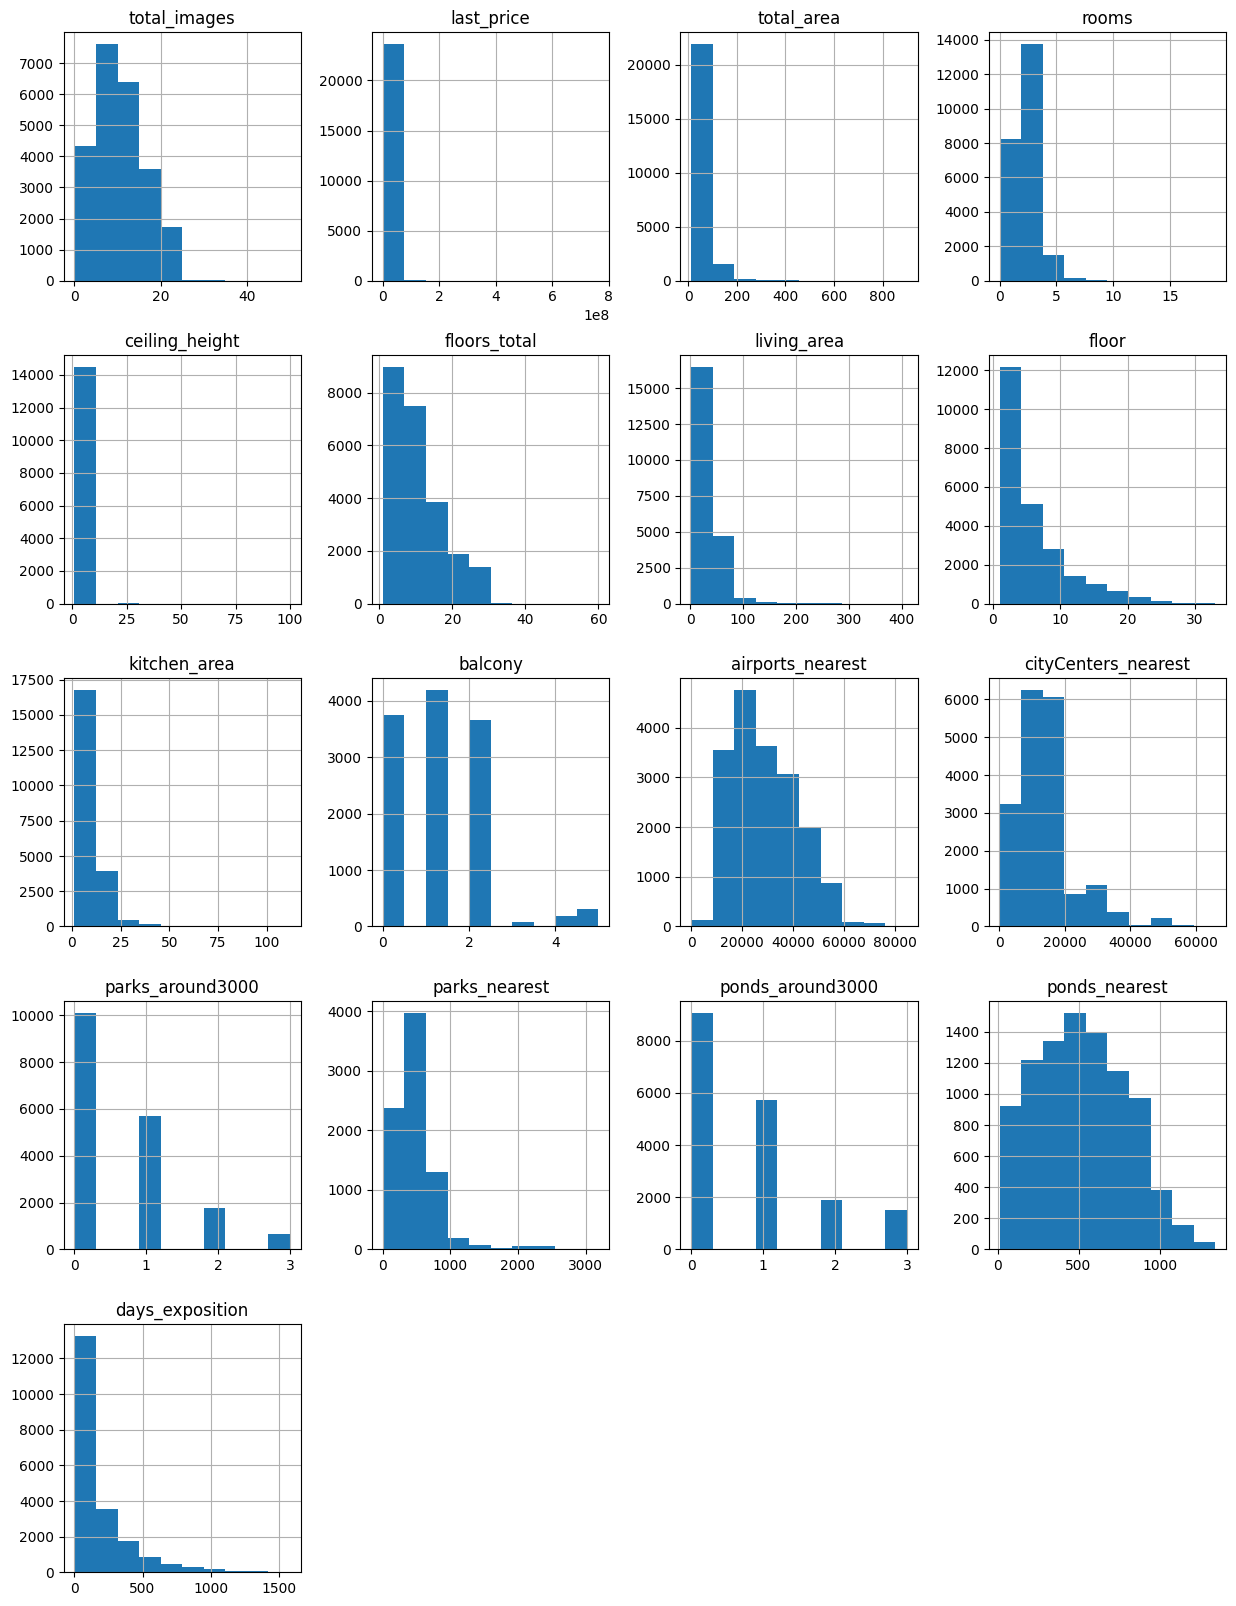

In [9]:
df.hist(figsize=(15, 20));

In [10]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропуски имеются в столбцах ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition. Некоторые столбцы содержат информацию, указанную продавцом недвижимости. Пропуски в этих столбцах могут быть вызваны тем, что продавец случайно не указал тот или иной параметр продаваемой недвижимости или сделал это специально. Другие столбцы содержат информацию, полученную путём картографии. Возможно, в некоторых случаях определить параметры картографически не удалось. Также пропуски могут быть вызваны проблемами при выгрузке и загрузке данных. Не исключено, что могли быть неправильно объединены столбцы таблицы. 

In [11]:
df.duplicated().sum()

0

Дубликатов в исследуемой таблице нет.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В столбце first_day_exposition указана дата, но тип данных в ней - object. В дальнейшем этот тип нужно будет изменить на datetime. Столбец is_apartment содержит переменную логическую величину. Его тип должен быть bool, а не object. Типы данных во всех остальных столбцах таблицы приемлемы для последующей работы с ними.

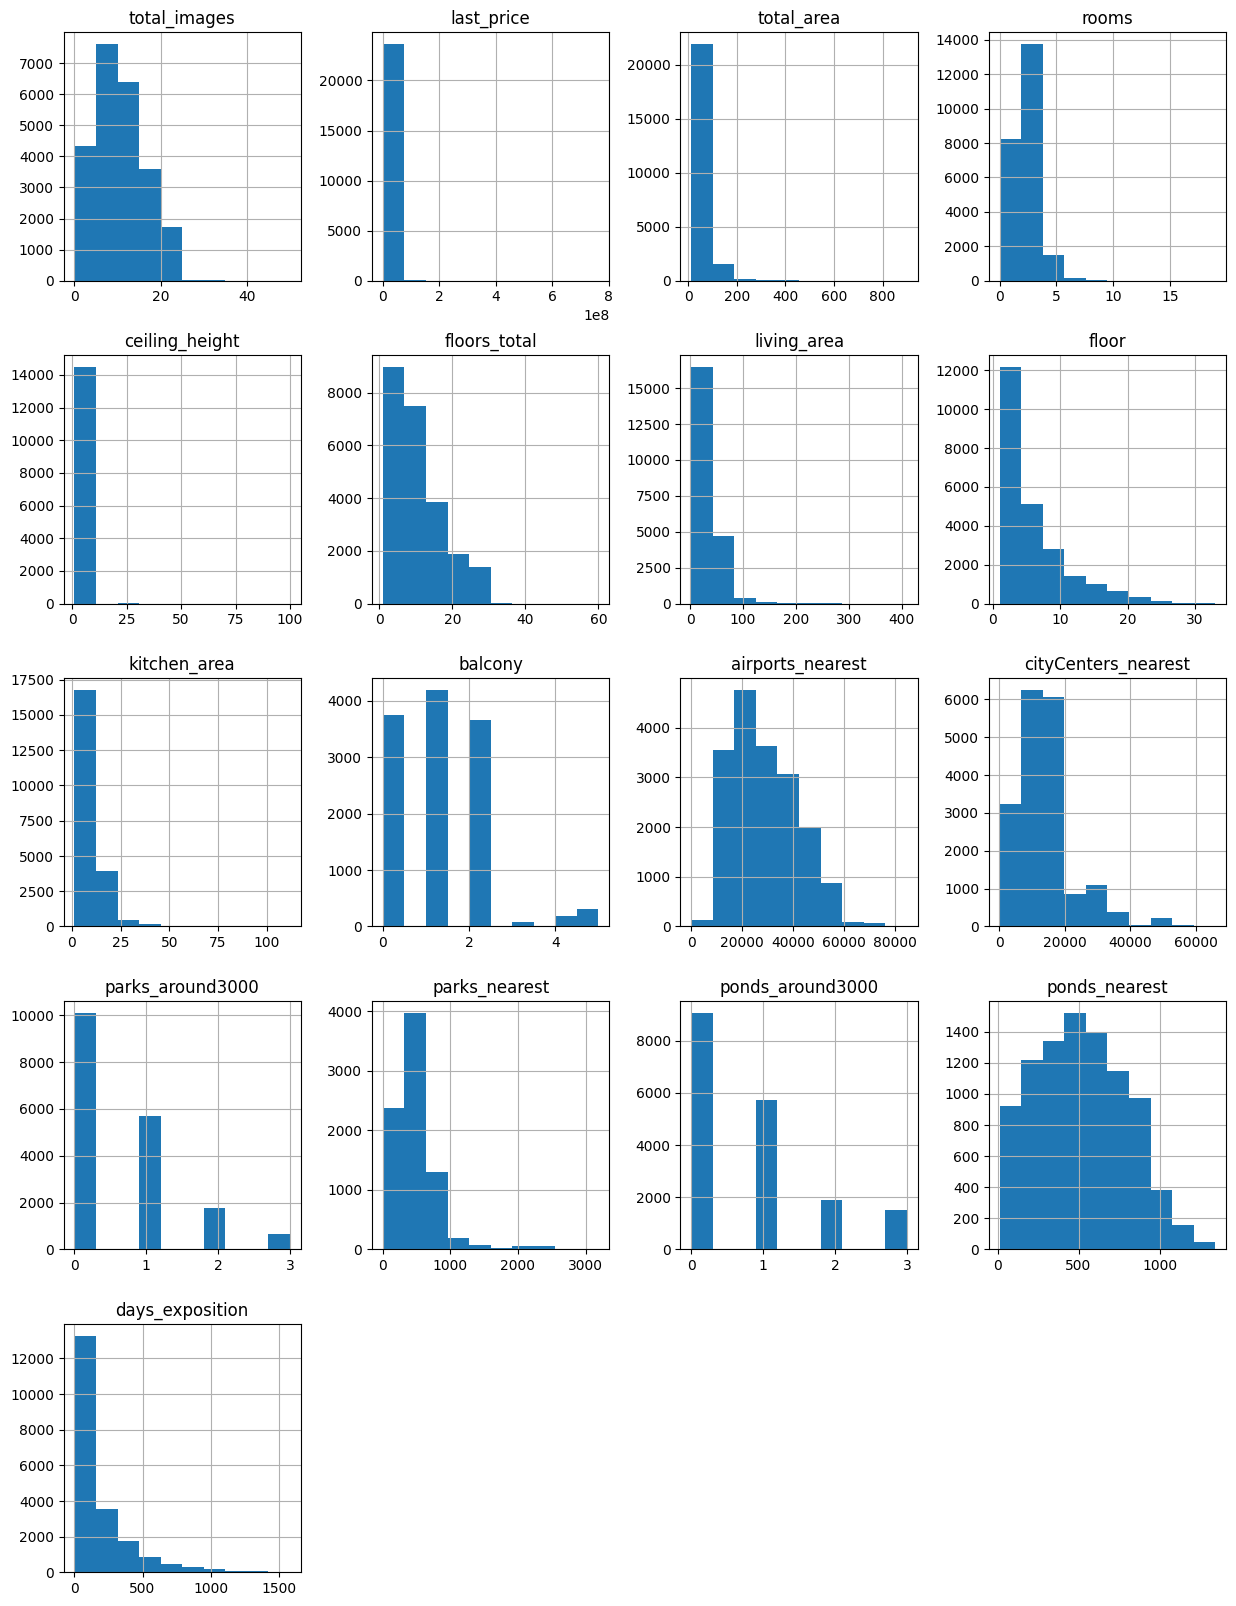

In [13]:
df.hist(figsize=(15, 20));

Первые статистически считающиеся выбросами значения можно невооруженным глазом заметить в столбце last_price. В этом столбце это выбросы с очень большим значением цены. Подобная картина наблюдается и в столбцах total_area, rooms, ceiling_height, floors_total, living_area, kitchen_area. Все эти распределения содержат выбросы в области больших значений. С распределениями велчин в остальных столбцах все в порядке.

### Предобработка данных

**Изучим уникальные значения в столбце с названиями населённых пунктов.**

In [14]:
df['locality_name'].nunique()

364

**В этом столбце 364 уникальных значения. Рассмотрим их.**

In [15]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

**Заметно, что в списке уникальных значений есть разные названия одних и тех же населённых пунктов. Исправим это.**

**Для этого создадим функцию, которая будет исключать из названий слова, приводящие к различию обозначений одних и тех же населённых пунктов.**

In [16]:
def filtr(word):
    w1 = re.compile('(\s*)поселок(\s*)')
    word = w1.sub('',word)
    w2 = re.compile('(\s*)посёлок(\s*)')
    word = w2.sub('',word)
    w3 = re.compile('(\s*)село(\s*)')
    word = w3.sub('',word)
    w4 = re.compile('(\s*)городской(\s*)')
    word = w4.sub('',word)
    w5 = re.compile('(\s*)городского типа(\s*)')
    word = w5.sub('',word)
    w6 = re.compile('(\s*)деревня(\s*)')
    word = w6.sub('',word)
    return word

**Приведём все названия населённых пунктов в столбце `locality_name` к нижнему регистру.**

In [17]:
df['locality_name'] = df['locality_name'].str.lower()

**Поменяем тип данных в столбце `locality_name` на `string`. Это необходимо для применения написанной функции `filtr`.**

In [18]:
df['locality_name'] = df['locality_name'].astype(str)

**Применим функцию `filtr` к каждому элементу из столбца с названиями населённых пунктов.**

In [19]:
df['locality_name_filtred'] = df['locality_name'].apply(lambda row: filtr(row))

**Вновь изучим уникальные значения в столбце с отфильтрованными названиями населённых пунктов.**

In [20]:
df['locality_name_filtred'].nunique()

312

**Раньше уникальных значений было 364. Теперь их число снизилось до 312. Были устранены разные названия одних и тех же населённых пунктов.**

**Рассмотрим список уникальных значений в столбце `locality_name_filtred`.**

In [21]:
df['locality_name_filtred'].unique()

array(['санкт-петербург', 'шушары', 'янино-1', 'парголово', 'мурино',
       'ломоносов', 'сертолово', 'петергоф', 'пушкин', 'кудрово',
       'коммунар', 'колпино', 'красный бор', 'гатчина', 'фёдоровское',
       'выборг', 'кронштадт', 'кировск', 'новое девяткино',
       'металлострой', 'лебяжье', 'сиверский', 'молодцово',
       'кузьмоловский', 'садовое товарищество новая ропша', 'павловск',
       'пикколово', 'всеволожск', 'волхов', 'кингисепп', 'приозерск',
       'сестрорецк', 'куттузи', 'аннино', 'ефимовский', 'плодовое',
       'заклинье', 'торковичи', 'первомайское', 'красное', 'понтонный',
       'сясьстрой', 'старая', 'лесколово', 'новый свет', 'сланцы',
       'путилово', 'ивангород', 'шлиссельбург', 'никольское',
       'зеленогорск', 'сосновый бор', 'оржицы', 'кальтино', 'романовка',
       'бугры', 'рощино', 'кириши', 'луга', 'волосово', 'отрадное',
       'павлово', 'оредеж', 'копорье', 'молодёжное', 'тихвин', 'победа',
       'нурма', 'синявино', 'тосно', 'стрельна',

**Действительно, в столбце с отфильтрованными названиями не осталось разных обозначений одних и тех же пунктов.**

**Удалим строки из датафрейма df, в которых в столбце с отфильтрованными названиями населённых пунктов `locality_name_filtred` есть пропуски.**

In [22]:
df = df[df['locality_name_filtred']!='nan']

**Поменяем тип данных в столбце `first_day_exposition` на `datetime`. Это необходимо для дальнейшей работы с данными из этого столбца (для извлечения такой информации, как день недели публикации, месяц публикации и год публикации объявления).**

In [23]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

**Поменям тип данных в столбце `is_apartment` на `bool`. Это необходимо для правильной работы с логическим типом данных в этом столбце. Параллельно устраним пропуски в нём. Если не указано информации о принадлежности квартиры типу апартаментов, то будем считать такую квартиру не апартаментами.**

In [24]:
df['is_apartment'] = df['is_apartment'].fillna(False)
df['is_apartment'] = df['is_apartment'].astype(bool)

**Посчитаем количество пропусков во всех столбцах датафрейма.**

In [25]:
df.isna().sum()

total_images                 0
last_price                   0
total_area                   0
first_day_exposition         0
rooms                        0
ceiling_height            9160
floors_total                85
living_area               1898
floor                        0
is_apartment                 0
studio                       0
open_plan                    0
kitchen_area              2269
balcony                  11513
locality_name                0
airports_nearest          5534
cityCenters_nearest       5511
parks_around3000          5510
parks_nearest            15586
ponds_around3000          5510
ponds_nearest            14565
days_exposition           3180
locality_name_filtred        0
dtype: int64

**Рассмотрим столбец с пропусками `-` `ceiling_height` (высота потолков в метрах). Перед тем как заполнять в нём пропуски, избавимся от аномальных значений в нём. Рассмотрим распределение высоты потолков.**

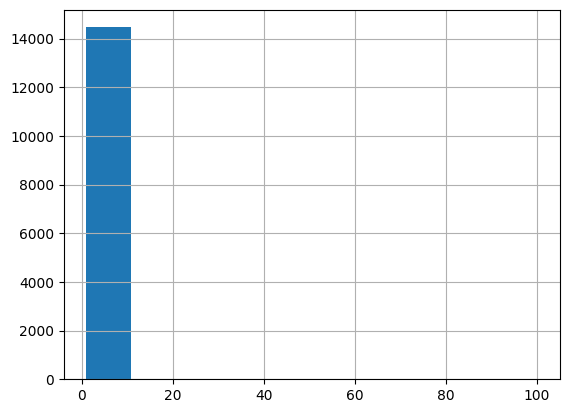

In [26]:
df['ceiling_height'].hist();

**Видно, что присутствуют значения высоты потолков от 10 до 100 метров, но в малых количествах. Предположим, что в действительности высотам потолков от 10 до 100 метров соответствуют реальные значения от 1 до 10 метров. Заменим все аномально большие значения на им соответствующие реальные значения.**

In [27]:
df.loc[(df['ceiling_height']>=10)&(df['ceiling_height']<=100),'ceiling_height'] /= 10

**Рассмотрим распределение высоты потолков после внесённых изменений.**

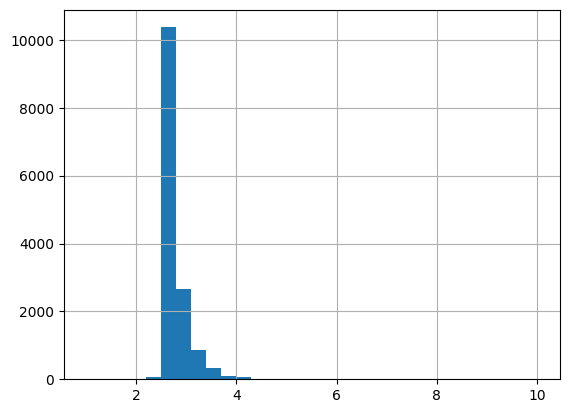

In [28]:
df['ceiling_height'].hist(bins=30);

**Заметим, что есть и такие квартиры, где высота потолков 1 метр. Это не реально. Уберем из датафрейма df все строки, в которых в столбце `ceiling_height` значения меньше 2 метров.**

In [29]:
df = df[(df['ceiling_height']>=2)|(df['ceiling_height'].isna())]

**Заполним пропуски в столбце `ceiling_height` медианным значением по нему.**

In [30]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

**Проверим количество пропусков в столбце `ceiling_height`.**

In [31]:
df['ceiling_height'].isna().sum()

0

**Пропусков в этом столбце больше нет.**

**Рассмотрим другой столбец с пропусками `-` `floors_total` (всего этажей в доме). Удалим все строки, в которых в столбце `floors_total` есть пропуски.**

In [32]:
df = df.dropna(subset=['floors_total'])

**Проверим количество пропусков в столбце `floors_total`.**

In [33]:
df['floors_total'].isna().sum()

0

**Пропусков в этом столбце больше нет.**

**Перейдем к следующему столбцу с пропусками `-` `living_area` (жилая площадь в квадратных метрах). Пропуски в нём можно заполнить в соответсвии со значениями в столбце `rooms` (число комнат). Заполним пропуски медианным значением для уникального числа комнат. Например, пропуски для однокомнатных квартир будут заполнены медианным значением по всем однокомнатным квартирам. Перед этим уберем аномальные значения из столбца `rooms`.**  

**Рассмотрим распределение числа комнат.**

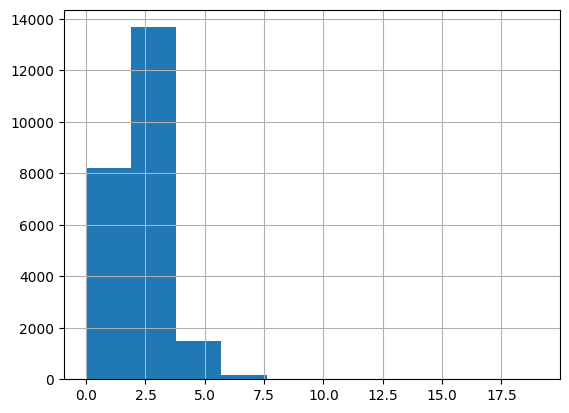

In [34]:
df['rooms'].hist();

**Заметно, что есть квартиры с 0 комнат. Предположим, что в таких квартирах на самом деле одна комната. Заменим все нули в столбце `rooms` на единицу.**

In [35]:
df.loc[(df['rooms']==0),'rooms'] = 1

**Теперь заполним пропуски в столбце `living_area`.**

In [36]:
for rooms_count in df['rooms'].unique():
    median_area = df[df['rooms']==rooms_count]['living_area'].median()
    df.loc[(df['rooms']==rooms_count)&(df['living_area'].isna()),'living_area'] = median_area 

**Проверим количество пропусков в столбце `living_area`.**

In [37]:
df['living_area'].isna().sum()

0

**Пропусков в этом столбце больше нет.**

**Рассмотрим столбец с пропусками `-` `kitchen_area` (площадь кухни в квадратных метрах). Заменим пропуски в этом столбце медианным значением по нему.**

In [38]:
df['kitchen_area'] = df['kitchen_area'].fillna(df['kitchen_area'].median())

**Проверим количество пропусков в столбце `kitchen_area`.**

In [39]:
df['kitchen_area'].isna().sum()

0

**Пропусков в этом столбце больше нет.**

**Рассмотрим столбец с пропусками `-` `balcony` (число балконов). Заменим пропуски в этом столбце нулём, предполагая, что если продавец не указал число балконов, то в квартире их нет.**

In [40]:
df['balcony'] = df['balcony'].fillna(0)

**Проверим количество пропусков в столбце `balcony`.**

In [41]:
df['balcony'].isna().sum()

0

**Пропусков в этом столбце больше нет.**

**В остальных столбцах предложить замену пропусков не предстовляется возможным. Поэтому оставим пропуски в них без изменений.**

Начнем со столбца со стоимостью квартиры - last_price. Рассмотрим распределение этой величины. 

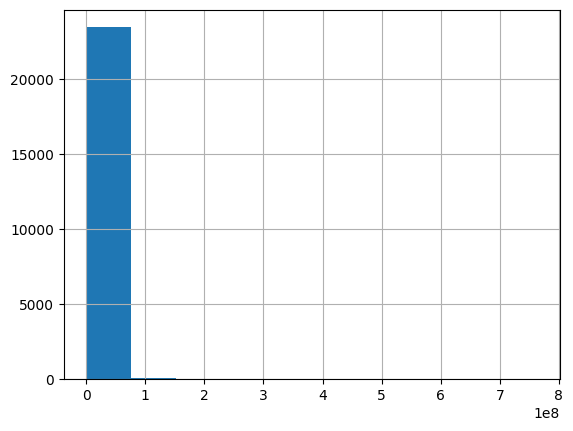

In [42]:
df['last_price'].hist();

По гистограмме заметно, что в столбце со стоимостью квартиры есть аномально большие значения. 

Построим для исследуемой величины диаграмму размаха.  

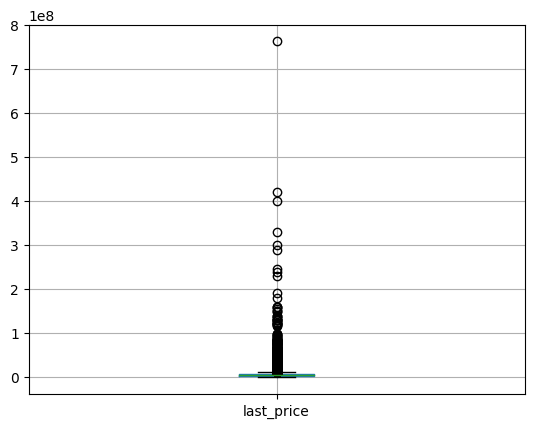

In [43]:
df.boxplot('last_price');

Получим описание данных распределения стоимости квартиры.  

In [44]:
df['last_price'].describe()

count    2.356000e+04
mean     6.540491e+06
std      1.091203e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [45]:
last_price_Q1 = 3.400000e+06
last_price_Q3 = 6.790000e+06

Уберем из данных о стоимости квартир все выбросы, лежащие сверху за границей, равной третьему квартилю распределения плюс 1,5 кратному межквартильному размаху.

In [46]:
df = df[df['last_price'] < (last_price_Q3 + 1.5 * (last_price_Q3 - last_price_Q1))]

Проверим, какое количество данных мы отбросили.

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21514 entries, 1 to 23698
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   total_images           21514 non-null  int64         
 1   last_price             21514 non-null  float64       
 2   total_area             21514 non-null  float64       
 3   first_day_exposition   21514 non-null  datetime64[ns]
 4   rooms                  21514 non-null  int64         
 5   ceiling_height         21514 non-null  float64       
 6   floors_total           21514 non-null  float64       
 7   living_area            21514 non-null  float64       
 8   floor                  21514 non-null  int64         
 9   is_apartment           21514 non-null  bool          
 10  studio                 21514 non-null  bool          
 11  open_plan              21514 non-null  bool          
 12  kitchen_area           21514 non-null  float64       
 13  b

In [48]:
(1 - 21514/23699) * 100

9.21979830372589

Отброшено всего 9.2 % данных.

Рассмотрим распределение стоимости квартир после удаления аномальных значений.

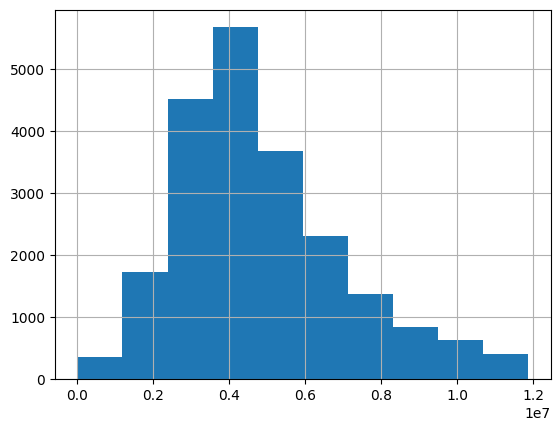

In [49]:
df['last_price'].hist();

Перейдём к столбцу с общей площадью квартиры - total_area. Рассмотрим распределение этой величины. 

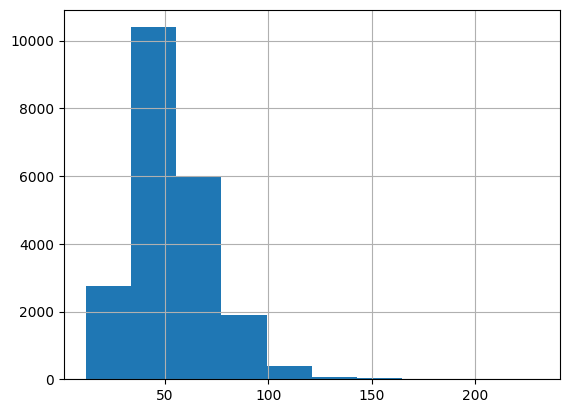

In [50]:
df['total_area'].hist();

По гистограмме заметно, что в столбце с общей площадью квартиры есть аномально большие значения. 

Уберём из данных все строки, в столбце total_area которых значения больше 150.  

In [51]:
df = df[df['total_area'] < 150]

Проверим, какое количество данных мы отбросили.

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21497 entries, 1 to 23698
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   total_images           21497 non-null  int64         
 1   last_price             21497 non-null  float64       
 2   total_area             21497 non-null  float64       
 3   first_day_exposition   21497 non-null  datetime64[ns]
 4   rooms                  21497 non-null  int64         
 5   ceiling_height         21497 non-null  float64       
 6   floors_total           21497 non-null  float64       
 7   living_area            21497 non-null  float64       
 8   floor                  21497 non-null  int64         
 9   is_apartment           21497 non-null  bool          
 10  studio                 21497 non-null  bool          
 11  open_plan              21497 non-null  bool          
 12  kitchen_area           21497 non-null  float64       
 13  b

In [53]:
(1 - 21497/23699) * 100

9.291531288240007

Отброшено всего 9.3 % данных от их исходного количества.

Рассмотрим распределение общей площади квартир после удаления аномальных значений.

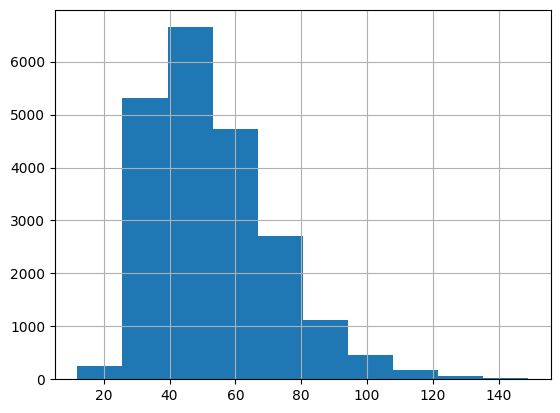

In [54]:
df['total_area'].hist();

Перейдём к столбцу с количеством комнат - rooms. Рассмотрим распределение этой величины. 

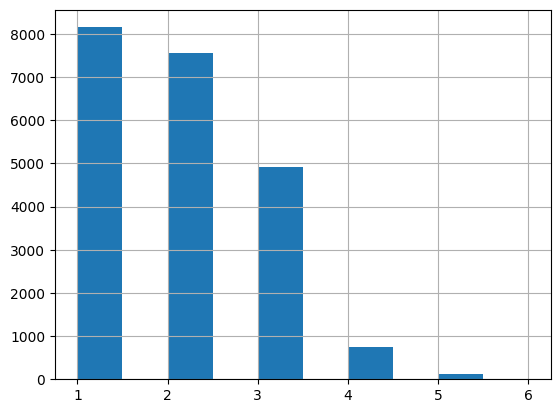

In [55]:
df['rooms'].hist();

После обработки аномальных значений в столбцах last_price и total_area столбец rooms перестал содержать аномальные значения.

Перейдём к столбцу с количеством этажей в доме - floors_total. Рассмотрим распределение этой величины. 

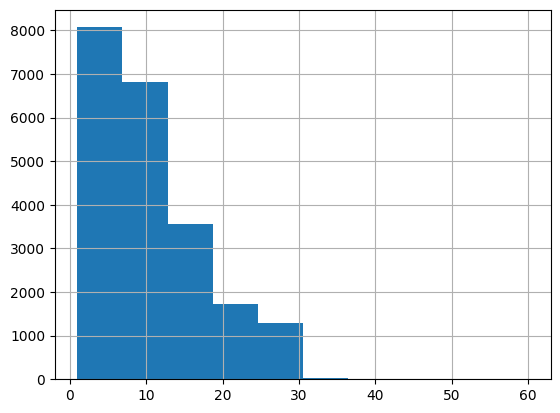

In [56]:
df['floors_total'].hist();

Оставим только те данные в таблице, которым соответствует количество этажей в доме меньше 40.

In [57]:
df = df[df['floors_total'] < 40]

Проверим, какое количество данных мы отбросили.

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21495 entries, 1 to 23698
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   total_images           21495 non-null  int64         
 1   last_price             21495 non-null  float64       
 2   total_area             21495 non-null  float64       
 3   first_day_exposition   21495 non-null  datetime64[ns]
 4   rooms                  21495 non-null  int64         
 5   ceiling_height         21495 non-null  float64       
 6   floors_total           21495 non-null  float64       
 7   living_area            21495 non-null  float64       
 8   floor                  21495 non-null  int64         
 9   is_apartment           21495 non-null  bool          
 10  studio                 21495 non-null  bool          
 11  open_plan              21495 non-null  bool          
 12  kitchen_area           21495 non-null  float64       
 13  b

In [59]:
(1 - 21495/23699) * 100

9.29997046288873

Отброшено всего 9.3 % данных от их исходного количества.

Перейдём к столбцу с жилой площадью - living_area. Рассмотрим распределение этой величины. 

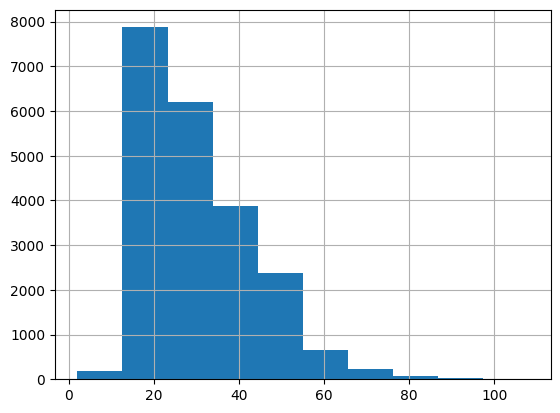

In [60]:
df['living_area'].hist();

После обработки аномальных значений в других столбцах столбец living_area перестал содержать аномальные значения.

Перейдём к столбцу с площадью кухни - kitchen_area. Рассмотрим распределение этой величины. 

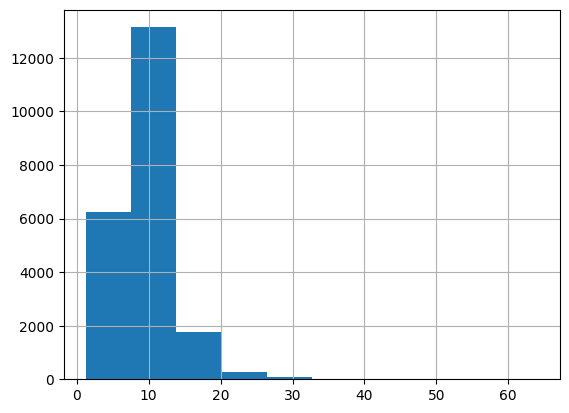

In [61]:
df['kitchen_area'].hist();

Оставим только те данные в таблице, которым соответствует площадь кухни меньше 40 квадратных метров.

In [62]:
df = df[df['kitchen_area'] < 40]

Проверим, какое количество данных мы отбросили.

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21484 entries, 1 to 23698
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   total_images           21484 non-null  int64         
 1   last_price             21484 non-null  float64       
 2   total_area             21484 non-null  float64       
 3   first_day_exposition   21484 non-null  datetime64[ns]
 4   rooms                  21484 non-null  int64         
 5   ceiling_height         21484 non-null  float64       
 6   floors_total           21484 non-null  float64       
 7   living_area            21484 non-null  float64       
 8   floor                  21484 non-null  int64         
 9   is_apartment           21484 non-null  bool          
 10  studio                 21484 non-null  bool          
 11  open_plan              21484 non-null  bool          
 12  kitchen_area           21484 non-null  float64       
 13  b

In [64]:
(1 - 21484/23699) * 100

9.34638592345669

Отброшено всего 9.34 % данных от их исходного количества.

Перейдём к столбцу с высотой потолков - ceiling_height. Рассмотрим распределение этой величины. 

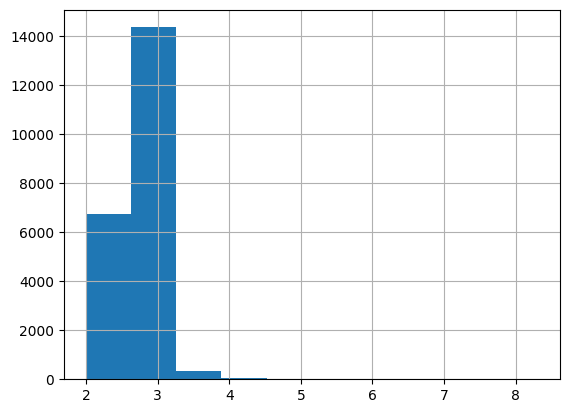

In [65]:
df['ceiling_height'].hist();

Оставим только те данные в таблице, которым соответствует высота потолков меньше 5 метров.

In [66]:
df = df[df['ceiling_height'] < 5]

Проверим, какое количество данных в итоге мы отбросили.

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21477 entries, 1 to 23698
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   total_images           21477 non-null  int64         
 1   last_price             21477 non-null  float64       
 2   total_area             21477 non-null  float64       
 3   first_day_exposition   21477 non-null  datetime64[ns]
 4   rooms                  21477 non-null  int64         
 5   ceiling_height         21477 non-null  float64       
 6   floors_total           21477 non-null  float64       
 7   living_area            21477 non-null  float64       
 8   floor                  21477 non-null  int64         
 9   is_apartment           21477 non-null  bool          
 10  studio                 21477 non-null  bool          
 11  open_plan              21477 non-null  bool          
 12  kitchen_area           21477 non-null  float64       
 13  b

In [68]:
(1 - 21477/23699) * 100

9.375923034727208

В итоге, после обработки аномалий во всех столбцах, отброшено всего 9.38 % данных от их исходного количества.

Рассмотрим все распределения после обработки аномальных значений.

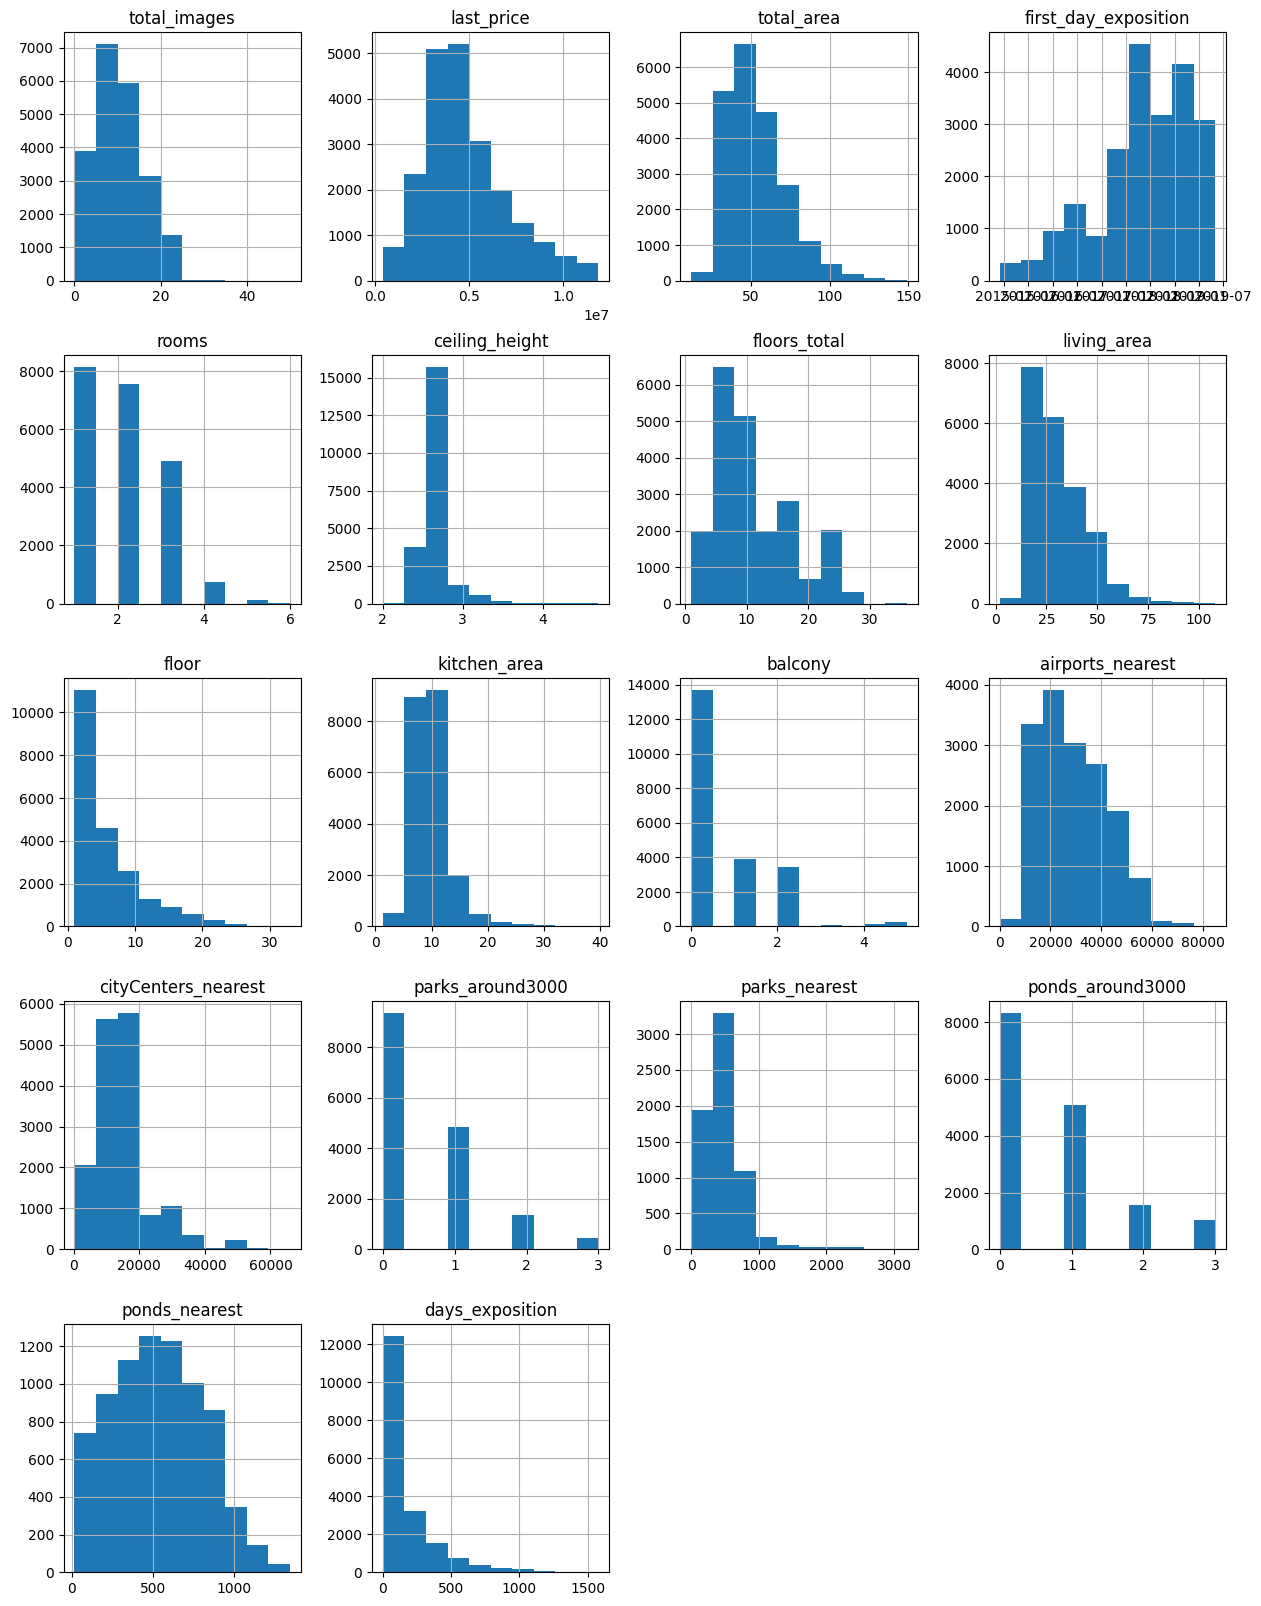

In [69]:
df.hist(figsize=(15, 20));

### Посчитайте и добавьте в таблицу новые столбцы

**Добавим в таблицу столбец с ценой одного квадратного метра.**

In [70]:
df['price_per_area'] = df['last_price']/df['total_area']

**Добавим в таблицу столбец с месяцем публикации объявления.**

In [71]:
df['exposition_month'] = pd.DatetimeIndex(df['first_day_exposition']).month

**Добавим в таблицу столбец с годом публикации объявления.**

In [72]:
df['exposition_year'] = pd.DatetimeIndex(df['first_day_exposition']).year

**Добавим в таблицу столбец с днём недели публикации объявления.**

In [73]:
df['exposition_day_of_week'] = df['first_day_exposition'].dt.weekday

**Добавим в таблицу столбец с расстоянием до центра города в километрах.**

In [74]:
df['cityCenters_nearest_km'] = round(df['cityCenters_nearest']/1000)

**Добавим в таблицу столбец с типом этажа квартиры.**

In [75]:
def floor_type(row):
    if row['floor']==1:
        return 'Первый этаж'
    if row['floor']==row['floors_total']:
        return 'Последний этаж'
    else:
        return 'Другой этаж'   

In [76]:
df['floor_type'] = df.apply(floor_type,axis=1)

### Проведите исследовательский анализ данных

**Исследуем данные в столбце `total_area` (общая площадь квартиры в квадратных метрах).**

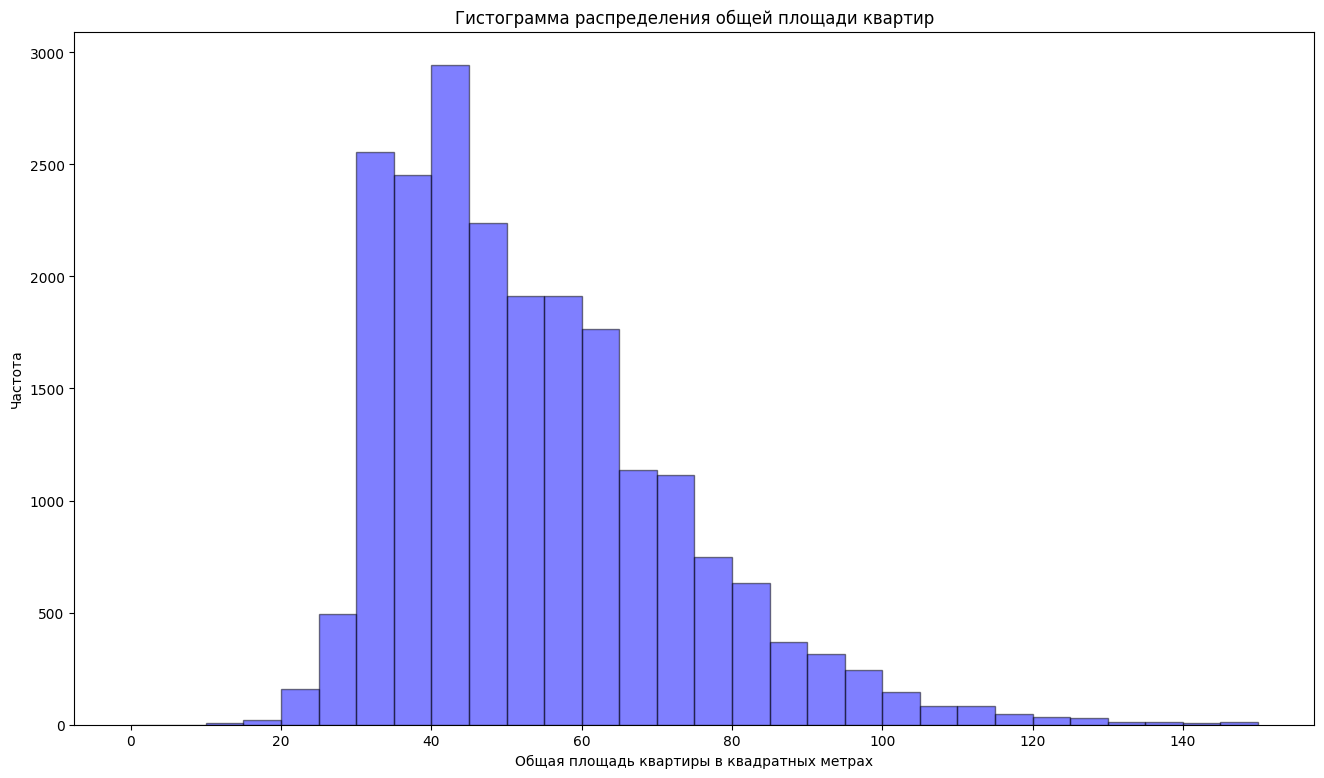

In [77]:
plt.figure(figsize=(16, 9));
plt.hist(df['total_area'], 
         bins = np.linspace(0, 150, 31), 
         alpha = 0.5, 
         color='blue',
         ec='black'
        )

plt.title('Гистограмма распределения общей площади квартир');
plt.xlabel('Общая площадь квартиры в квадратных метрах');
plt.ylabel('Частота');

**Общая площадь квартир распределена нормально. Преимущественно встречаются объявления с квартирами, общая площадь которых равна приблизительно 42 квадратных метров. Квартир с общей площадью больше 140 квадратных метров намного меньше.**

**Исследуем данные в столбце `living_area` (жилая площадь квартиры в квадратных метрах).**

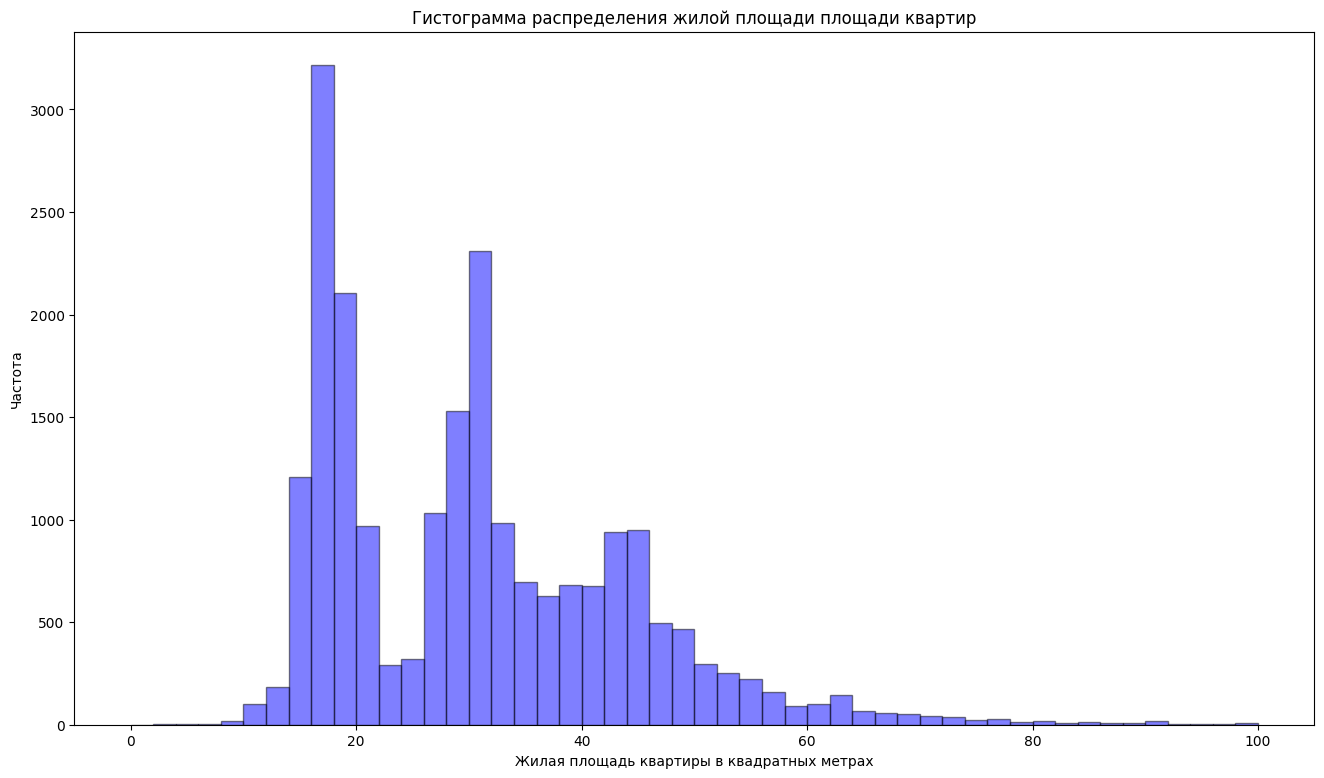

In [78]:
plt.figure(figsize=(16, 9));
plt.hist(df['living_area'], 
         bins = np.linspace(0, 100, 51), 
         alpha = 0.5, 
         color='blue',
         ec='black'
        )

plt.title('Гистограмма распределения жилой площади площади квартир');
plt.xlabel('Жилая площадь квартиры в квадратных метрах');
plt.ylabel('Частота');

**Чаще всего встречаются квартиры с жилой площадью около 18, 36 и 45 квадратных метров. Такое распределение скорее всего связано с количеством жилых комнат в квартирах. То есть 18 метров соответствуют однушкам, а 36 и 45 `-` двушкам и трешкам соответственно.**

**Исследуем данные в столбце `kitchen_area` (площадь кухни в квадратных метрах).**

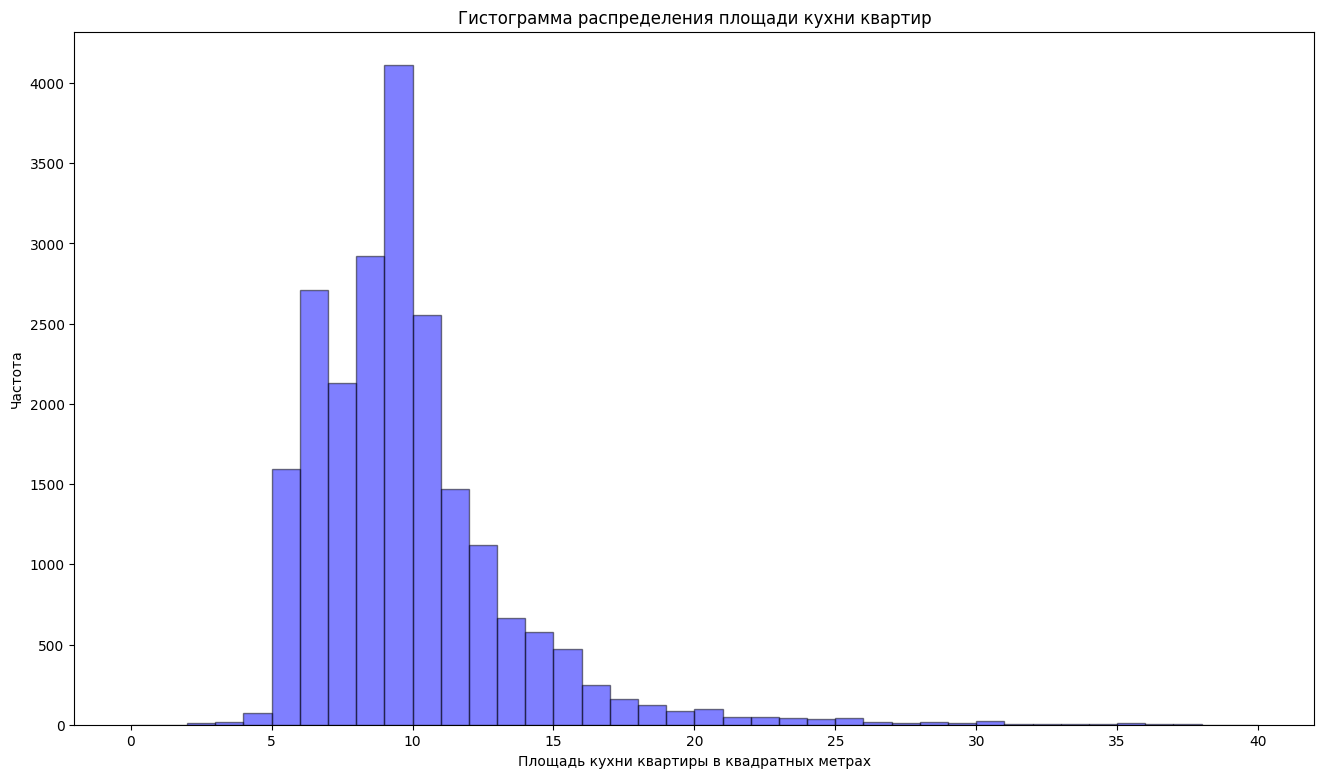

In [79]:
plt.figure(figsize=(16, 9));
plt.hist(df['kitchen_area'], 
         bins = np.linspace(0, 40, 41), 
         alpha = 0.5, 
         color='blue',
         ec='black'
        )

plt.title('Гистограмма распределения площади кухни квартир');
plt.xlabel('Площадь кухни квартиры в квадратных метрах');
plt.ylabel('Частота');

**Площадь кухни распределена нормально. Чаще всего встречаются квартиры с площадью кухни равной 8 квадратных метров. Квартир с площадью кухни больше 30 квадратных метров намного меньше.**

**Исследуем данные в столбце `last_price` (цена объекта).**

In [80]:
df['last_price_in_millions'] = df['last_price']/1000000

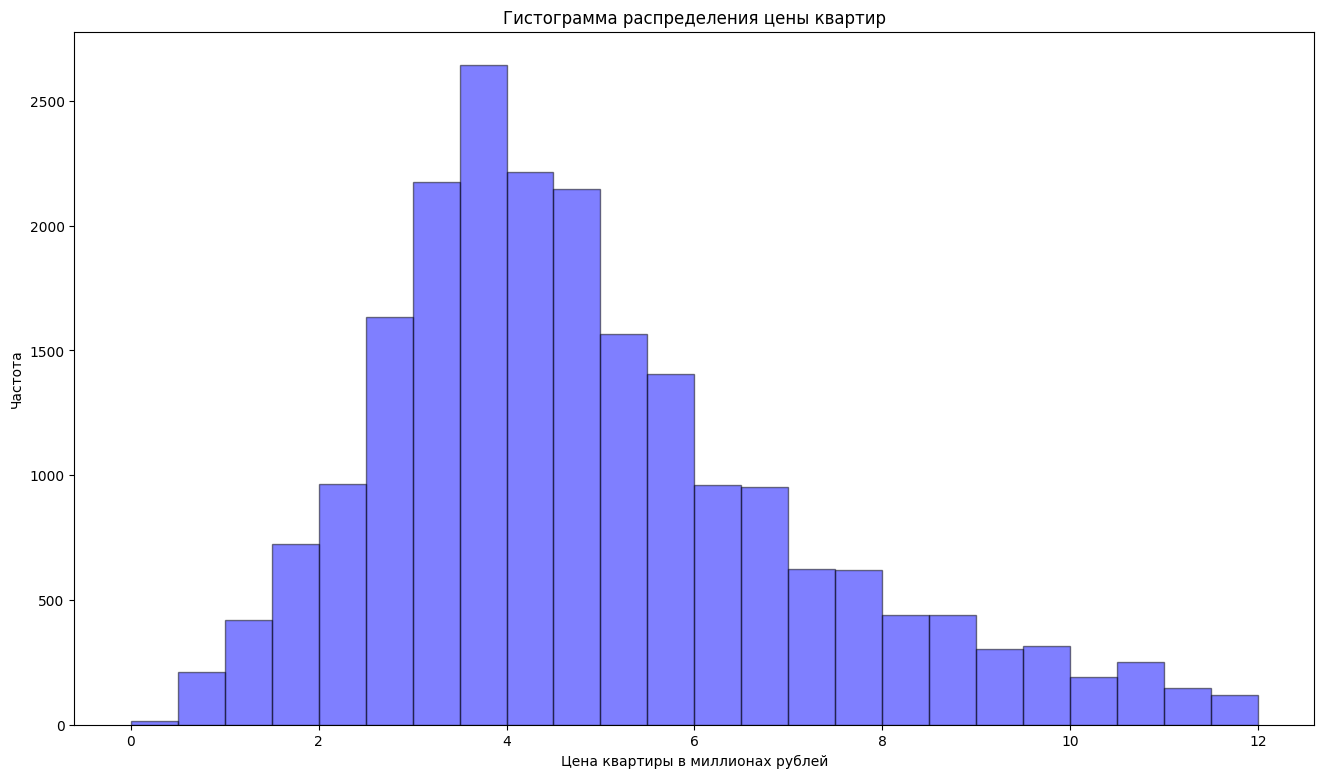

In [81]:
plt.figure(figsize=(16, 9));
plt.hist(df['last_price_in_millions'], 
         bins = np.linspace(0, 12, 25), 
         alpha = 0.5, 
         color='blue',
         ec='black'
        )

plt.title('Гистограмма распределения цены квартир');
plt.xlabel('Цена квартиры в миллионах рублей');
plt.ylabel('Частота');

**Цена распределена нормально. Наиболее частое её значение это 4 миллиона рублей.**

**Исследуем данные в столбце `rooms` (количество комнат).**

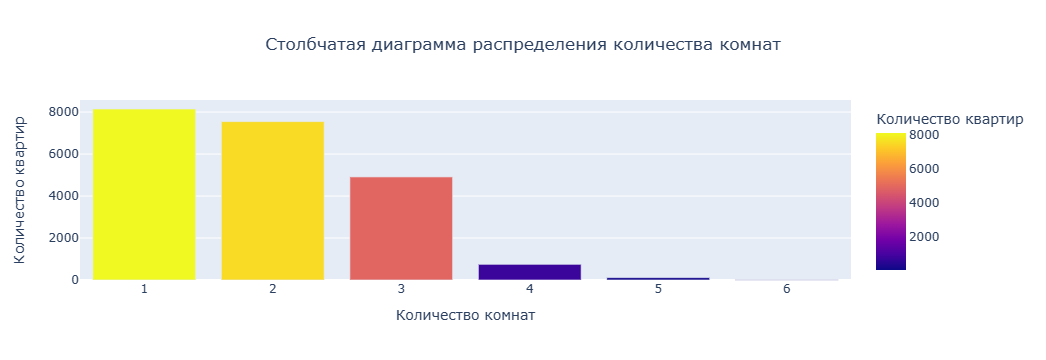

In [82]:
table_for_barplot = df.groupby(by='rooms')['last_price'].agg('count').reset_index()

fig = px.bar(table_for_barplot, x = 'rooms', y = 'last_price', color = 'last_price', 
                 title = 'Столбчатая диаграмма распределения количества комнат',
                 labels={'rooms': 'Количество комнат','last_price':'Количество квартир'}
                )
    
fig.update_layout(title_x=0.5) # установить центральное положение названия графика 
fig.show()

**Наиболее частые случаи `-` это квартиры с 1 и 2 комнатами. Квартир с большим числом комнат меньше. Чем больше количество комнат, тем меньше объявлений, соответствующих их количеству.**

**Исследуем данные в столбце `ceiling_height` (высота потолков в метрах).**

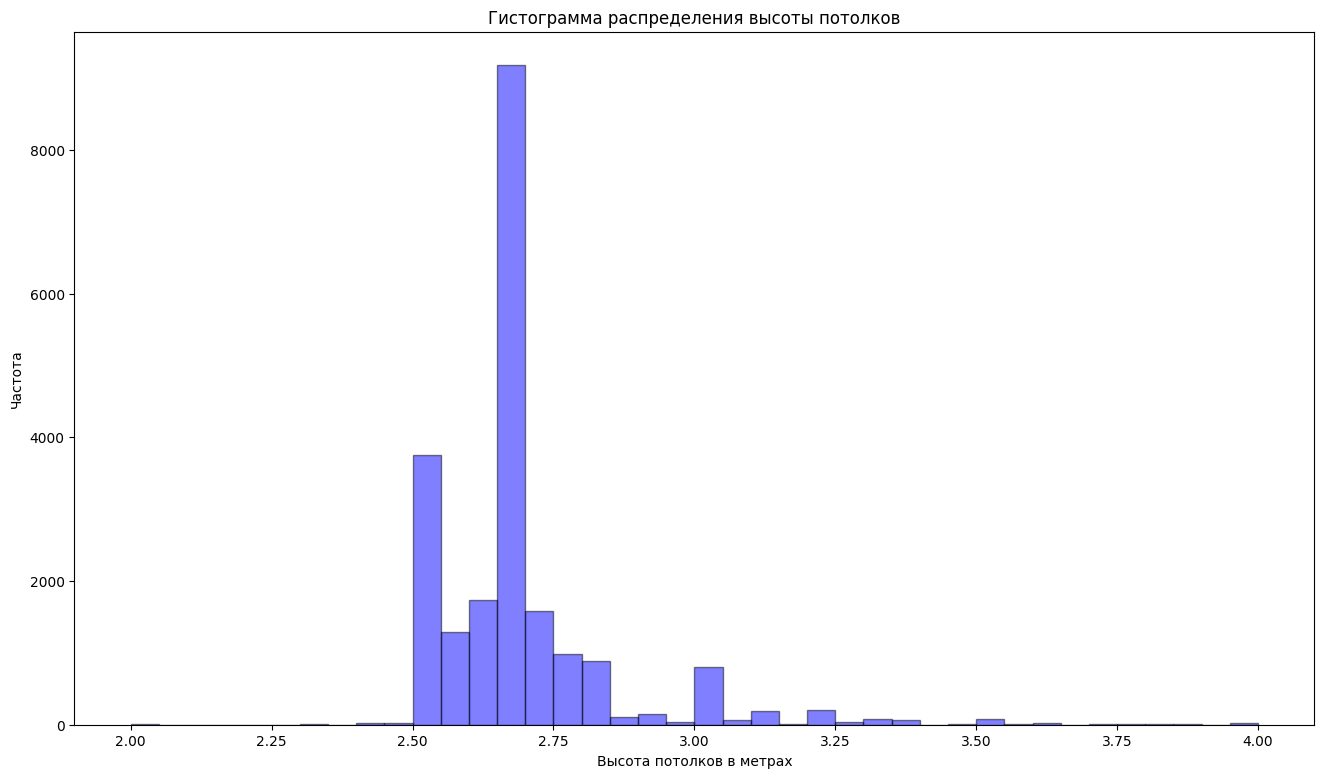

In [83]:
plt.figure(figsize=(16, 9));
plt.hist(df['ceiling_height'], 
         bins = np.linspace(2, 4, 41), 
         alpha = 0.5, 
         color='blue',
         ec='black'
        )

plt.title('Гистограмма распределения высоты потолков');
plt.xlabel('Высота потолков в метрах');
plt.ylabel('Частота');

**Наиболее частое значение высоты потолков `-` 2.7 метров.**

**Исследуем данные в столбце `floor` (этаж квартиры).**

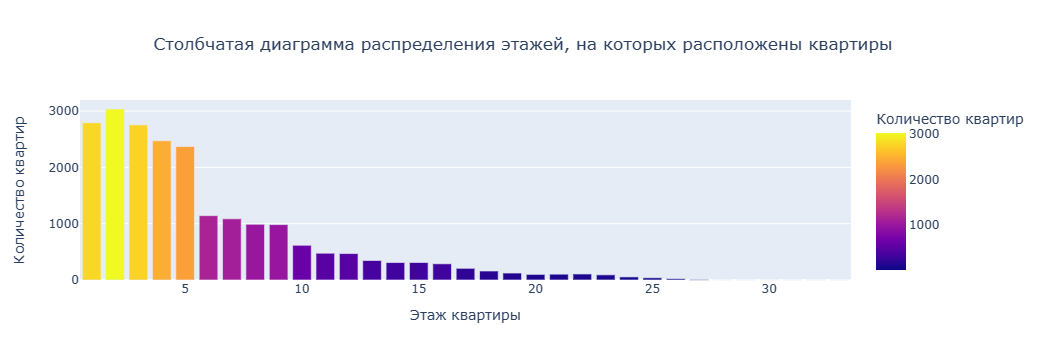

In [84]:
table_for_barplot = df.groupby(by='floor')['last_price'].agg('count').reset_index()

fig = px.bar(table_for_barplot, x = 'floor', y = 'last_price', color = 'last_price', 
                 title = 'Столбчатая диаграмма распределения этажей, на которых расположены квартиры',
                 labels={'floor': 'Этаж квартиры','last_price':'Количество квартир'}
                )
    
fig.update_layout(title_x=0.5) # установить центральное положение названия графика 
fig.show()

**Самый частый случай `-` это квартиры, расположенные на втором этаже. Чем выше этаж, тем меньше объявлений с квартирами, соответствующих ему.**

**Исследуем данные в столбце `floor_type` (тип этажа квартиры).**

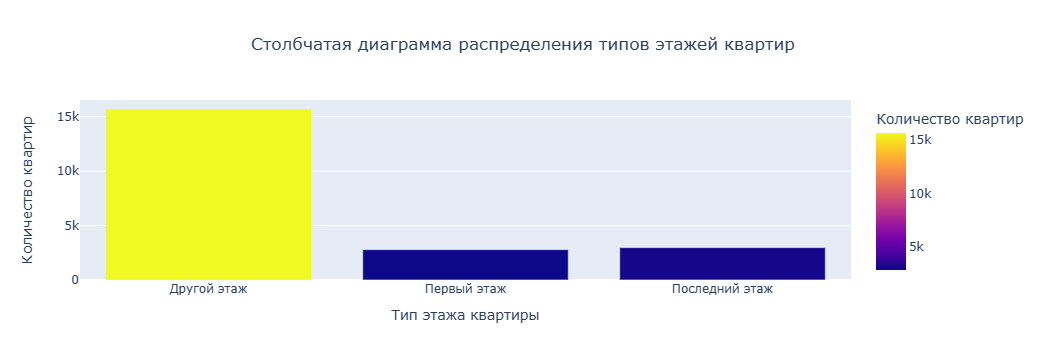

In [85]:
table_for_barplot = df.groupby(by='floor_type')['last_price'].agg('count').reset_index()

fig = px.bar(table_for_barplot, x = 'floor_type', y = 'last_price', color = 'last_price', 
                 title = 'Столбчатая диаграмма распределения типов этажей квартир',
                 labels={'floor_type': 'Тип этажа квартиры','last_price':'Количество квартир'}
                )
    
fig.update_layout(title_x=0.5) # установить центральное положение названия графика 
fig.show()

**Квартир, расположенных на первом и последнем этажах приблизительно одинаково (по 3000 шт). Объявлений с другими этажами заметно больше.**

**Исследуем данные в столбце `floors_total` (всего этажей в доме).**

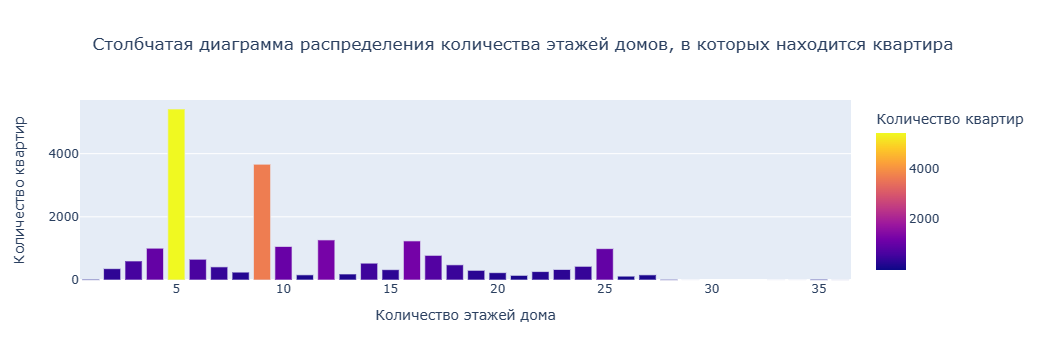

In [86]:
table_for_barplot = df.groupby(by='floors_total')['last_price'].agg('count').reset_index()

fig = px.bar(table_for_barplot, x = 'floors_total', y = 'last_price', color = 'last_price', 
                 title = 'Столбчатая диаграмма распределения количества этажей домов, в которых находится квартира',
                 labels={'floors_total': 'Количество этажей дома','last_price':'Количество квартир'}
                )
    
fig.update_layout(title_x=0.5) # установить центральное положение названия графика 
fig.show()

**Больше всего объявлений соответсвует квартирам, находящимся в пяти и девяти этажных домах.**

**Исследуем данные в столбце `cityCenters_nearest` (расстояние до центра города в метрах).**

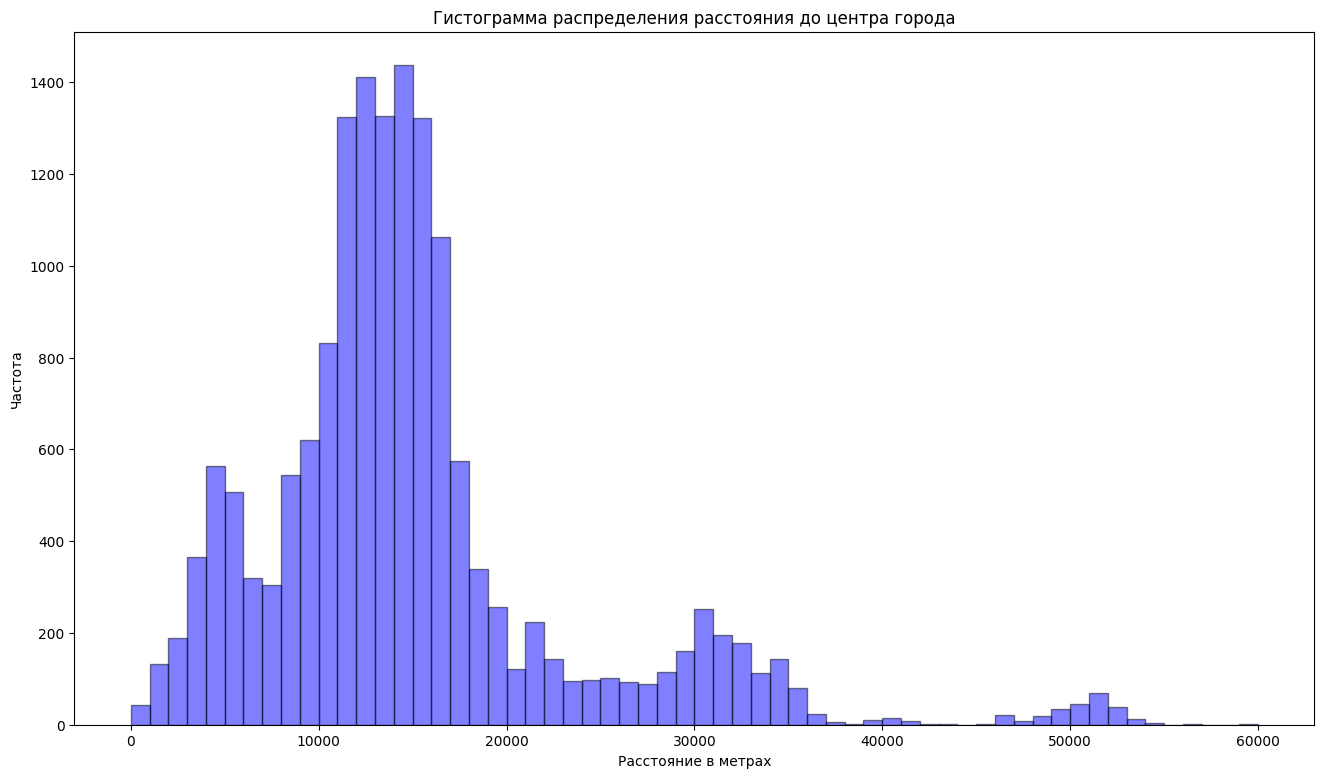

In [87]:
plt.figure(figsize=(16, 9));
plt.hist(df['cityCenters_nearest'], 
         bins = np.linspace(0, 60000, 61), 
         alpha = 0.5, 
         color='blue',
         ec='black'
        )

plt.title('Гистограмма распределения расстояния до центра города');
plt.xlabel('Расстояние в метрах');
plt.ylabel('Частота');

**Наиболее частые расстояния до центра города `-` 5 км, 12 км и 15 км.**

**Исследуем данные в столбце `airports_nearest` (расстояние до ближайшего аэропорта).**

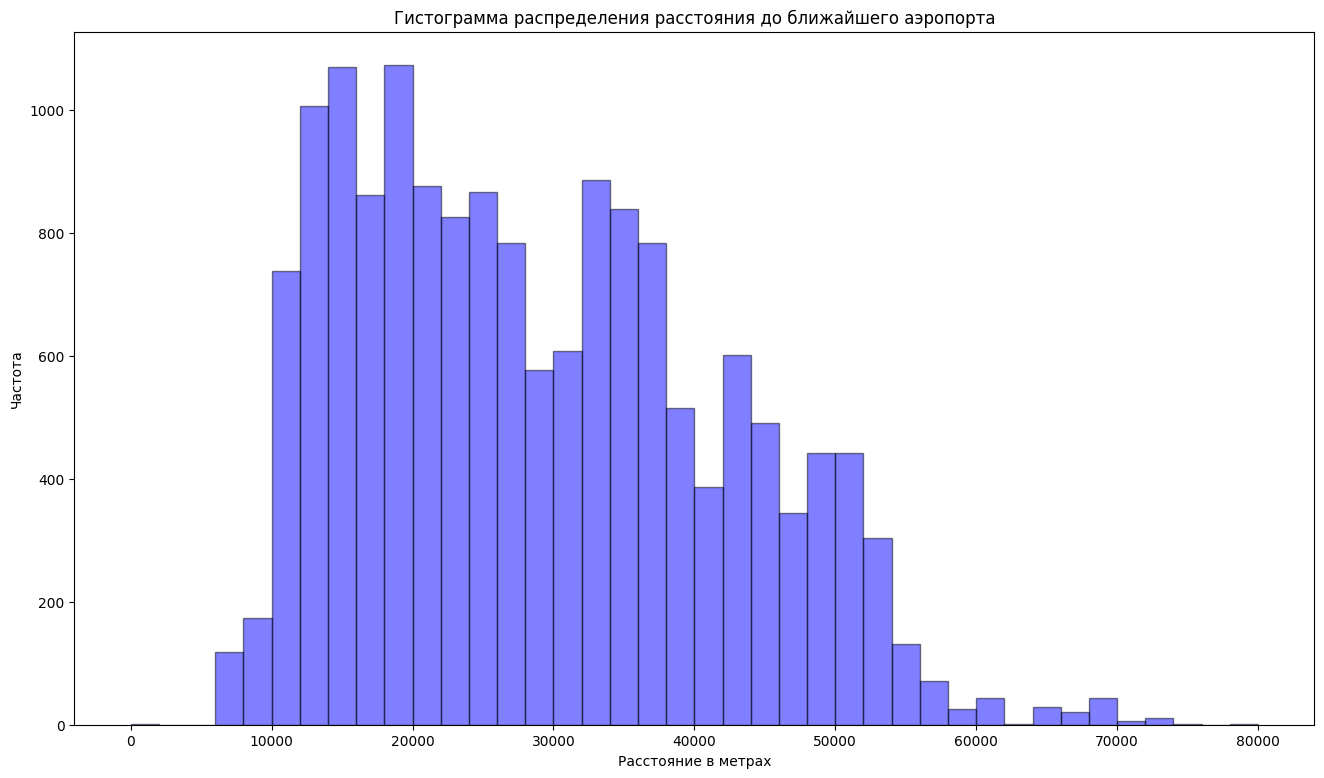

In [88]:
plt.figure(figsize=(16, 9));
plt.hist(df['airports_nearest'], 
         bins = np.linspace(0, 80000, 41), 
         alpha = 0.5, 
         color='blue',
         ec='black'
        )

plt.title('Гистограмма распределения расстояния до ближайшего аэропорта');
plt.xlabel('Расстояние в метрах');
plt.ylabel('Частота');

**Наиболее частые расстояния до ближайшего аэропорта `-` это расстояния от 16 до 38 км.**

**Исследуем данные в столбце `parks_nearest` (расстояние до ближайшего парка).**

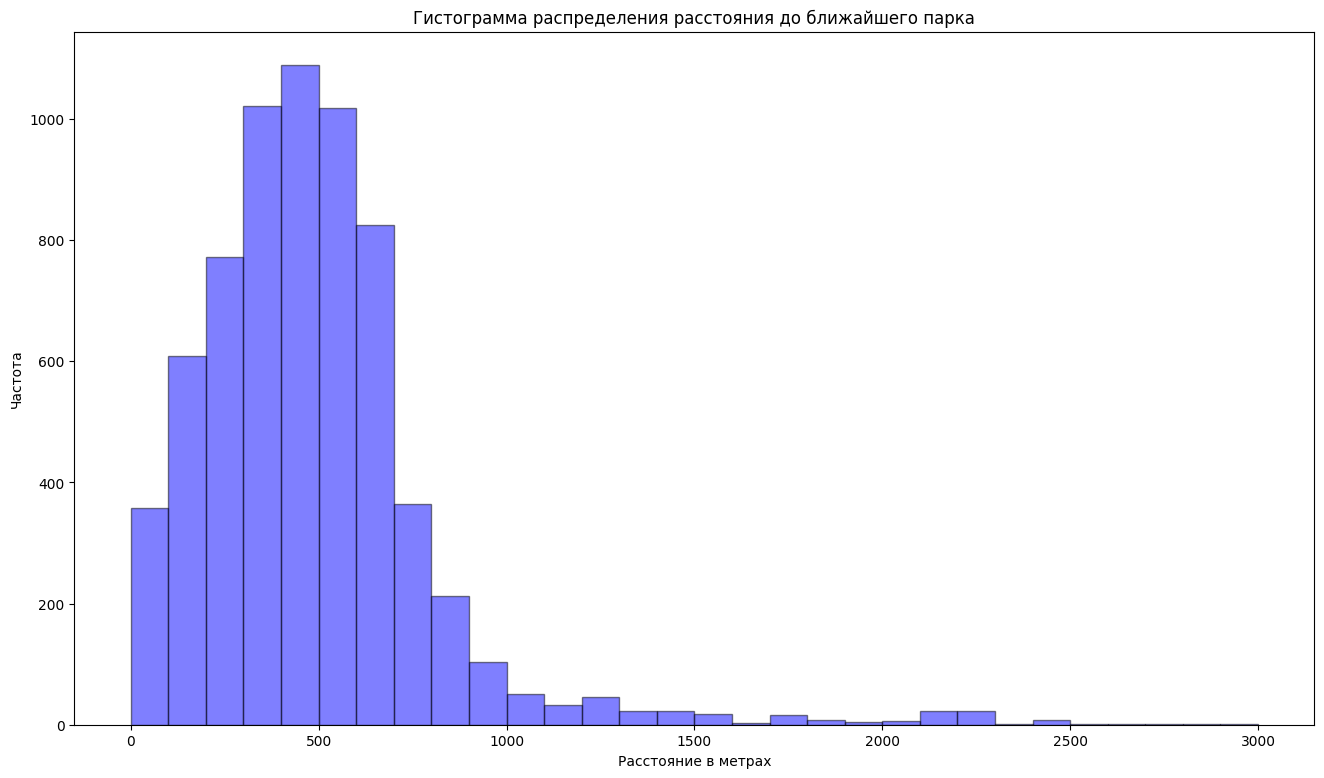

In [89]:
plt.figure(figsize=(16, 9));
plt.hist(df['parks_nearest'], 
         bins = np.linspace(0, 3000, 31), 
         alpha = 0.5, 
         color='blue',
         ec='black'
        )
plt.title('Гистограмма распределения расстояния до ближайшего парка');
plt.xlabel('Расстояние в метрах');
plt.ylabel('Частота');

**Расстояние до ближайшего парка распределено нормально. Наиболее частое значение этого параметра `-` 500 метров.**

**Исследуем данные в столбце `exposition_day_of_week` (день недели публикации объявления).**

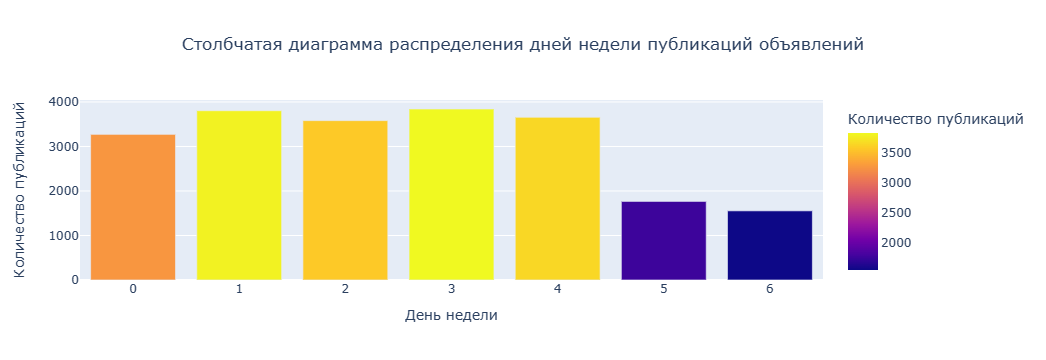

In [90]:
table_for_barplot = df.groupby(by='exposition_day_of_week')['last_price'].agg('count').reset_index()

fig = px.bar(table_for_barplot, x = 'exposition_day_of_week', y = 'last_price', color = 'last_price', 
                 title = 'Столбчатая диаграмма распределения дней недели публикаций объявлений',
                 labels={'exposition_day_of_week': 'День недели','last_price':'Количество публикаций'}
                )
    
fig.update_layout(title_x=0.5) # установить центральное положение названия графика 
fig.show()

**Чаще всего объявления публиковались в будние дни. Причем число публикаций распределено равномерно по будним дням. На выходных публикации происходили реже.**

**Исследуем данные в столбце `exposition_month` (месяц публикации объявления).**

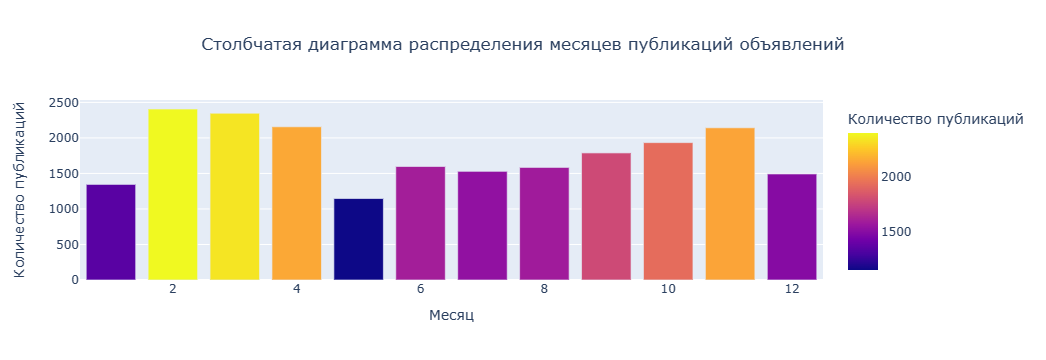

In [91]:
table_for_barplot = df.groupby(by='exposition_month')['last_price'].agg('count').reset_index()

fig = px.bar(table_for_barplot, x = 'exposition_month', y = 'last_price', color = 'last_price', 
                 title = 'Столбчатая диаграмма распределения месяцев публикаций объявлений',
                 labels={'exposition_month': 'Месяц','last_price':'Количество публикаций'}
                )
    
fig.update_layout(title_x=0.5) # установить центральное положение названия графика 
fig.show()

**На месяцы осени приходится большое количесто объявлений. Причем с каждым месяцем осени объявлений становится всё больше. На последний месяц зимы приходится больше всего объявлений среди других месяцев года. На май приходится меньше всего объявлений. Летом объявления равномерно распределены по месяцам.**

**Изучим, как быстро продавались квартиры.**

**Построим гистограмму для столбца `days_exposition`.**

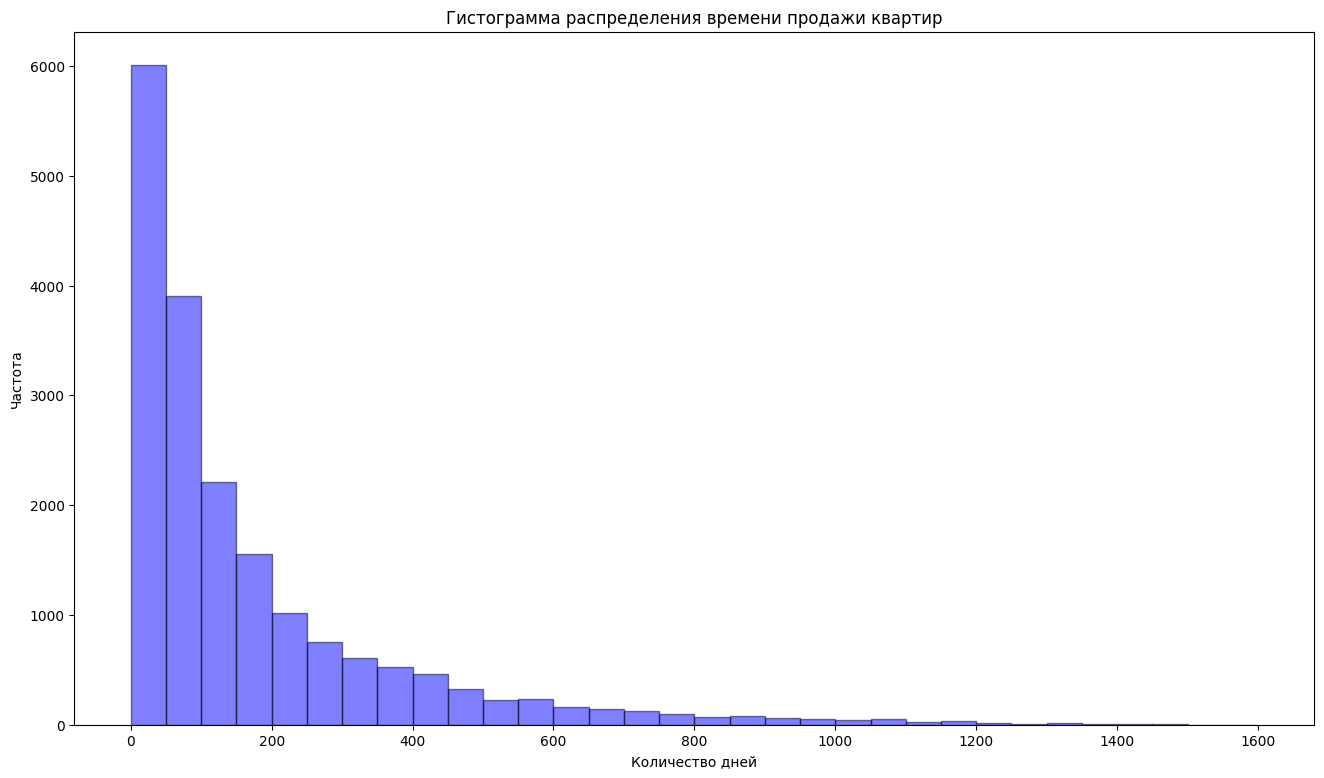

In [92]:
plt.figure(figsize=(16, 9));
plt.hist(df['days_exposition'], 
         bins = np.linspace(0, 1600, 33), 
         alpha = 0.5, 
         color='blue',
         ec='black'
        )
plt.title('Гистограмма распределения времени продажи квартир');
plt.xlabel('Количество дней');
plt.ylabel('Частота');

**Найдем медиану и среднее для этого столбца.**

In [93]:
df['days_exposition'].median()

91.0

In [94]:
df['days_exposition'].mean()

173.01262666454454

**В среднем продажа квартиры занимает от 3 месяцев до полугода. Но есть и случаи с очень быстрыми продажами в течение 10 дней. Также имеются и случаи с необычно долгими продажами по 4 года.**

**Определим, какие факторы больше всего влияют на общую стоимость объекта.**

**Начнем со связи стоимости с общей площадью объекта. Для этого построим диаграмму рассеяния.**

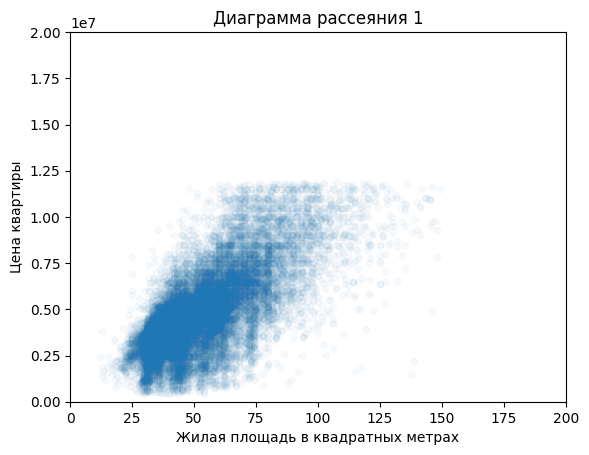

In [95]:
df.plot(x='total_area', y='last_price', kind='scatter', alpha=0.03,xlim=(0,200),ylim=(0,20000000));
plt.title('Диаграмма рассеяния 1');
plt.xlabel('Жилая площадь в квадратных метрах');
plt.ylabel('Цена квартиры');

**Заметно, что величины положительно коррелированы. То есть в среднем большей общей площади соответсвтует большая стоимость.**

**Рассчитаем коэффициент корреляции между общей площадью и стоимостью квартиры.**

In [96]:
df['total_area'].corr(df['last_price'])

0.6998842646916146

**Действительно, величины положительно и умеренно коррелированы.**

**Рассмотрим связь стоимости и жилой площади объекта.**

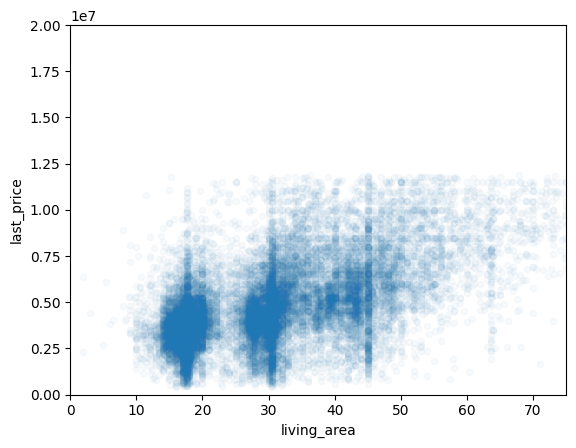

In [97]:
df.plot(x='living_area', y='last_price', kind='scatter', alpha=0.03,xlim=(0,75),ylim=(0,20000000)); 

**Во-первых заметно, что площади и соответсвтующие им цены сгруппированы в окрестностях 18, 30 и 45 квадратных метров.**

**Во-вторых видно, что в среднем цена тем выше, чем больше жилая площадь. Величины положительно коррелированы.**

**Рассчитаем коэффициент корреляции между ними.**

In [98]:
df['living_area'].corr(df['last_price'])

0.5597466804191822

**Действительно величины положительно коррелированы.**

**Рассмотрим связь стоимости и площади кухни.**

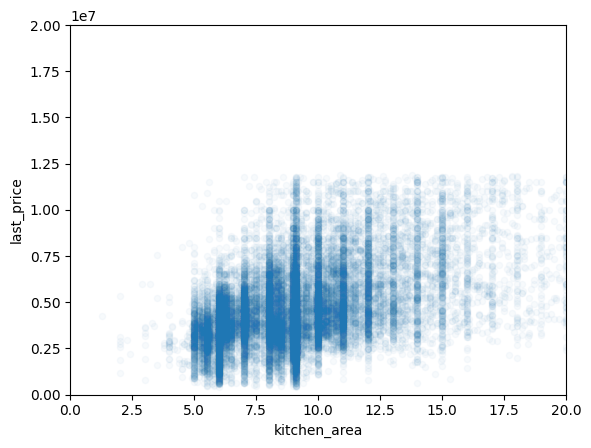

In [99]:
df.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.03,xlim=(0,20),ylim=(0,20000000)); 

**Заметно, что величины положительно коррелированы. То есть в среднем большей площади кухни соответсвтует большая стоимость.**

**Рассчитаем коэффициент корреляции между площадью кухни и стоимостью квартиры.**

In [100]:
df['kitchen_area'].corr(df['last_price'])

0.4662016526770489

**Положительная корреляция есть, но не такая сильная как в случае с общей площадью.**

**Рассмотрим связь стоимости и количества комнат.**

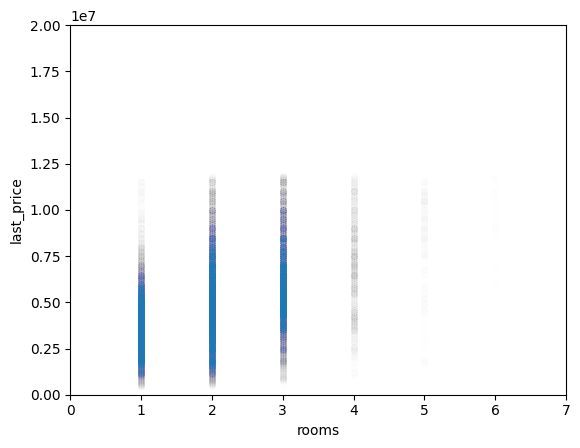

In [101]:
df.plot(x='rooms', y='last_price', kind='scatter', alpha=0.005,xlim=(0,7),ylim=(0,20000000)); 

**Заметно, что большему количеству комнат соответсвует более высокая цена. Величины также положительно коррелированы.**

**Оценим коээфициент корреляции между количеством комнат и ценой.**

In [102]:
df['rooms'].corr(df['last_price'])

0.44861877652654863

**Величины положительно коррелированы, но слабо.**

Создадим сводную таблицу для категорий этажей.

In [103]:
floot_type_data = df.pivot_table(index='floor_type',values='last_price',aggfunc='median')

Рассмотрим полученную сводную таблицу.

In [104]:
floot_type_data

last_price
floor_type                
Другой этаж      4590000.0
Первый этаж      3800000.0
Последний этаж   4000000.0

Посторим barplot для исследуемой связи.

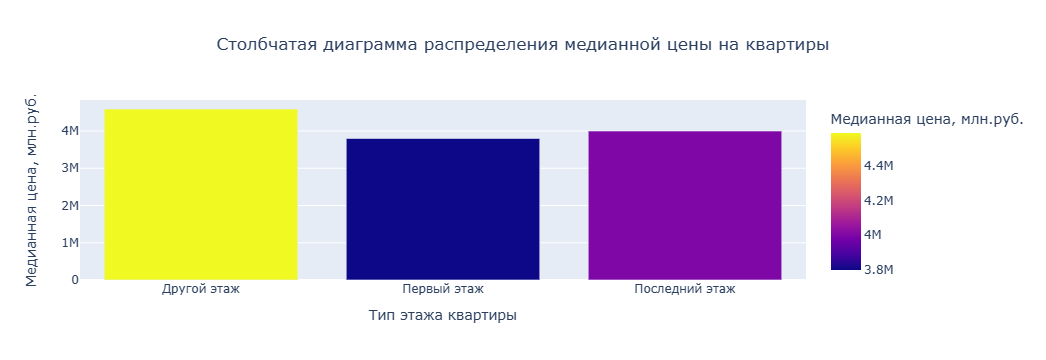

In [105]:
table_for_barplot = df.groupby(by='floor_type')['last_price'].agg('median').reset_index()

fig = px.bar(table_for_barplot, x = 'floor_type', y = 'last_price', color = 'last_price', 
                 title = 'Столбчатая диаграмма распределения медианной цены на квартиры',
                 labels={'floor_type': 'Тип этажа квартиры','last_price':'Медианная цена, млн.руб.'}
                )
    
fig.update_layout(title_x=0.5) # установить центральное положение названия графика 
fig.show()

На столбчатой диаграмме видно, что в среднем квартиры, расположенные на первом этаже, самые дешёвые. Расположенные на последем этаже квартиры в среднем немного дороже. А остальные квартиры самые дорогие.

Создадим сводную таблицу для дня публикации объявления о продажи квартиры.

In [106]:
day_of_week_data = df.pivot_table(index='exposition_day_of_week',values='last_price',aggfunc='median')

Рассмотрим полученную сводную таблицу.

In [107]:
day_of_week_data

last_price
exposition_day_of_week            
0                        4400000.0
1                        4490000.0
2                        4490000.0
3                        4400000.0
4                        4350000.0
5                        4400000.0
6                        4350000.0

Посторим barplot для исследуемой связи.

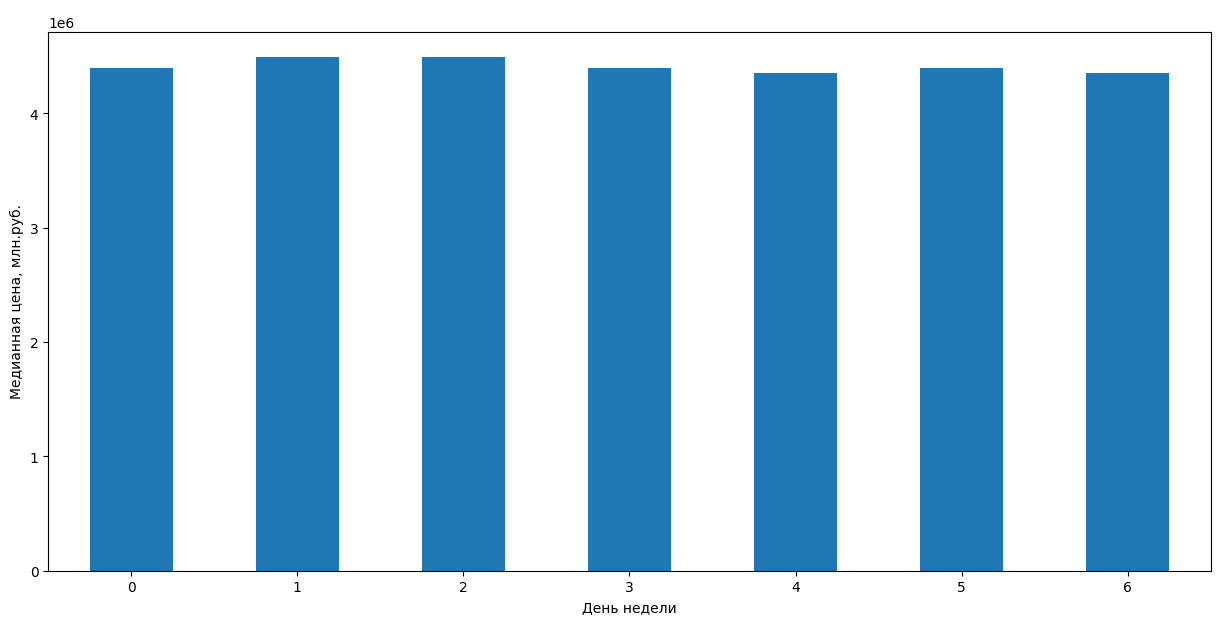

In [108]:
day_of_week_data.plot.bar(y='last_price',rot=0,legend=False,figsize=(15,7));
plt.title(' ');
plt.xlabel('День недели');
plt.ylabel('Медианная цена, млн.руб.');

Заметно, что стоимость объекта не зависит от дня недели публикации объявления.

Создадим сводную таблицу для месяца публикации объявления о продажи квартиры.

In [109]:
month_data = df.pivot_table(index='exposition_month',values='last_price',aggfunc='median')

Рассмотрим полученную сводную таблицу.

In [110]:
month_data

last_price
exposition_month            
1                  4400000.0
2                  4400000.0
3                  4400000.0
4                  4555000.0
5                  4345000.0
6                  4200000.0
7                  4350000.0
8                  4350000.0
9                  4400000.0
10                 4400000.0
11                 4450000.0
12                 4470000.0

Посторим barplot для исследуемой связи.

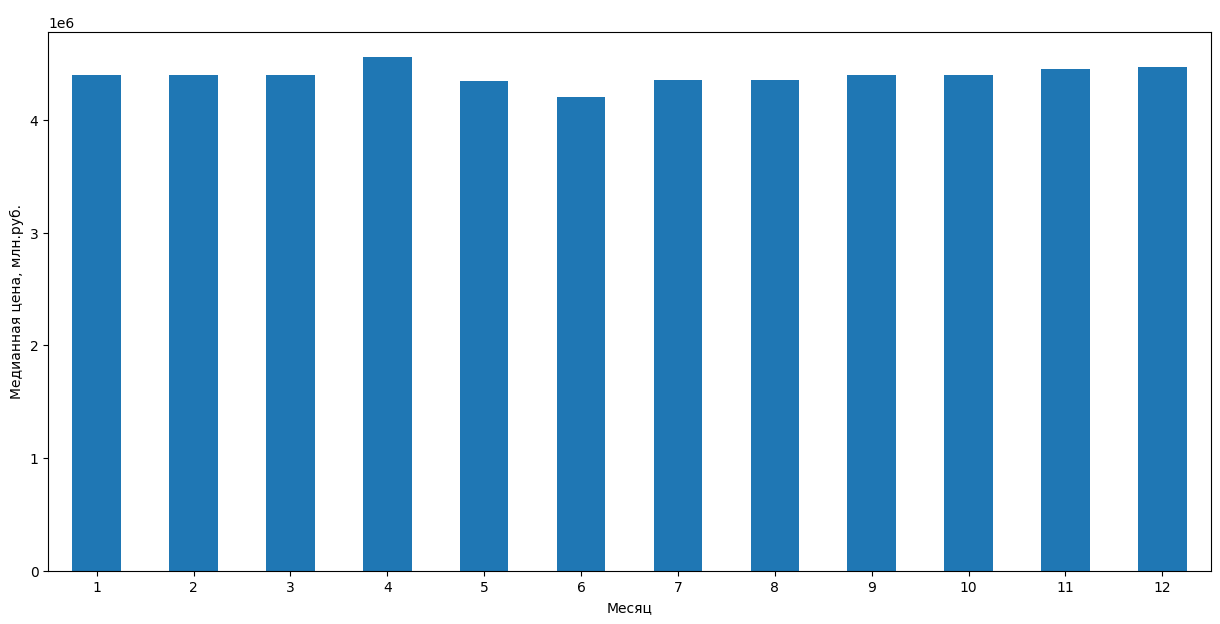

In [111]:
month_data.plot.bar(y='last_price',rot=0,legend=False,figsize=(15,7));
plt.title(' ');
plt.xlabel('Месяц');
plt.ylabel('Медианная цена, млн.руб.');

Заметно, что стоимость объекта не зависит от месяца публикации объявления.

Создадим сводную таблицу для года публикации объявления о продажи квартиры.

In [112]:
year_data = df.pivot_table(index='exposition_year',values='last_price',aggfunc='median')

Рассмотрим полученную сводную таблицу.

In [113]:
year_data

last_price
exposition_year            
2014              5500000.0
2015              4880000.0
2016              4300000.0
2017              4295000.0
2018              4390000.0
2019              4800000.0

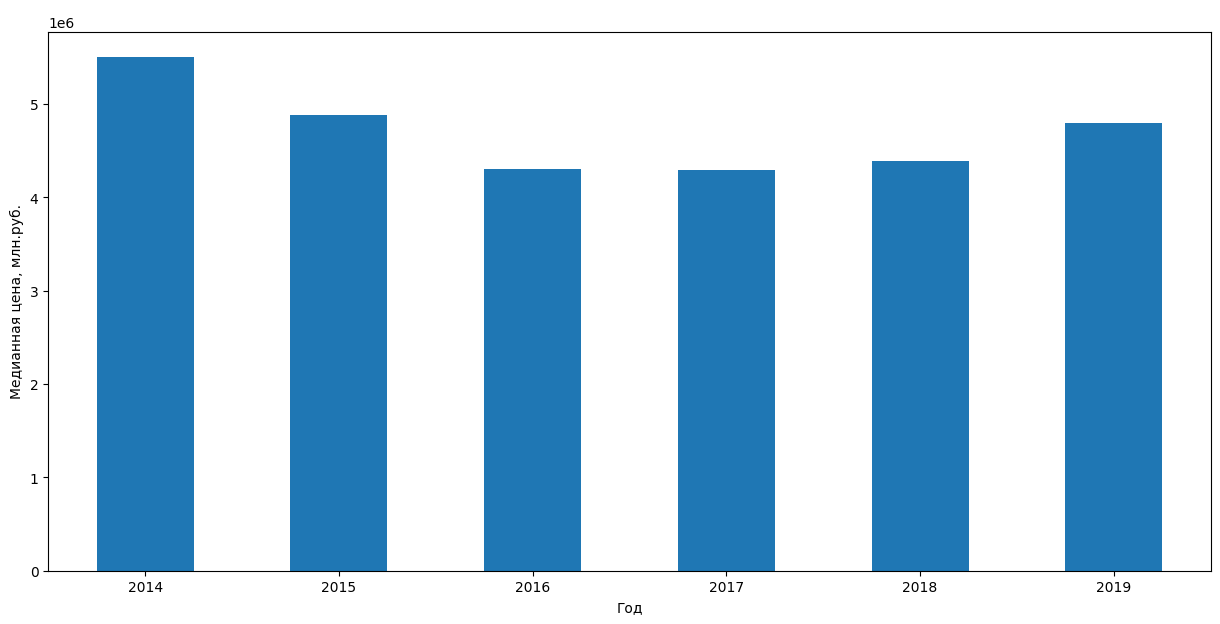

In [114]:
year_data.plot.bar(y='last_price',rot=0,legend=False,figsize=(15,7));
plt.title(' ');
plt.xlabel('Год');
plt.ylabel('Медианная цена, млн.руб.');

По столбчатой диаграмме можно сделать вывод о том, что медианная цена на квартиры уменьшалась с 2014 года по 2017, а после 2017 года возрастала.

**Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.**

In [115]:
top10 = df['locality_name_filtred'].value_counts().head(10)

In [116]:
names = top10.index

In [117]:
prices_per_area = []
for name in names:
    median_price_per_area = df[df['locality_name_filtred']==name]['price_per_area'].median()
    prices_per_area.append(median_price_per_area)

In [118]:
table = pd.DataFrame({'населённый пункт':names,'средняя цена квадратного метра':prices_per_area})

In [119]:
table.sort_values('средняя цена квадратного метра',ascending=False).reset_index(drop=True)

населённый пункт  средняя цена квадратного метра
0  санкт-петербург                   101875.837802
1           пушкин                    98437.500000
2          кудрово                    95435.612635
3        парголово                    91780.224134
4           мурино                    86268.871316
5           шушары                    76876.172608
6          колпино                    74689.878234
7          гатчина                    67695.961995
8       всеволожск                    65789.473684
9           выборг                    58158.319871

**Самая высокая стоимость квадратного метра в Санкт-Петербурге.**

**Самая низкая стоимость квадратного метра в Выборге.**

Построим barplot для топ10 по средней цене.

In [120]:
sorted_table = table.sort_values('средняя цена квадратного метра',ascending=False).reset_index(drop=True)

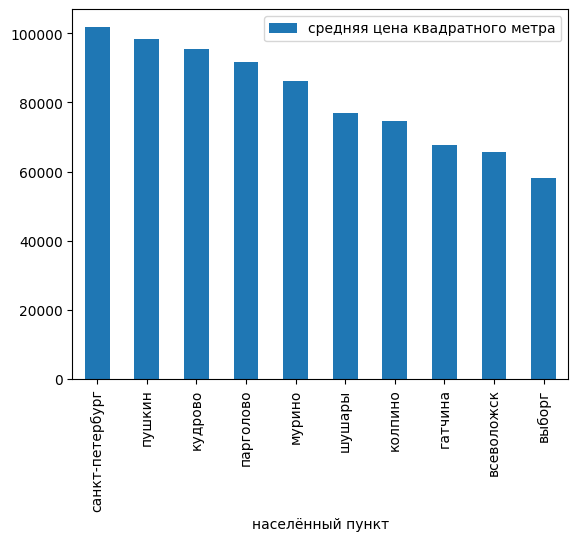

In [121]:
sorted_table.plot.bar(x='населённый пункт', y='средняя цена квадратного метра', rot=90);

**Посчитаем среднюю цену каждого километра до центра Санкт-Петербурга.**

In [122]:
df['price_per_distance'] = df['last_price']/df['cityCenters_nearest_km']

In [123]:
distances = df[df['locality_name_filtred']=='санкт-петербург']['cityCenters_nearest_km'].unique()

In [124]:
prices_per_distance = []
for distance in distances:
    median_price_per_distance = df[(df['cityCenters_nearest_km']==distance)&(df['locality_name_filtred']=='санкт-петербург')]['price_per_distance'].median()
    prices_per_distance.append(median_price_per_distance/1000000)
    

In [125]:
result_table = pd.DataFrame({'расстояние в километрах':distances,'средняя цена расстояния в миллионах рублей':prices_per_distance})

In [126]:
sorted_result_table = result_table.sort_values('расстояние в километрах',ascending=True).reset_index(drop=True)

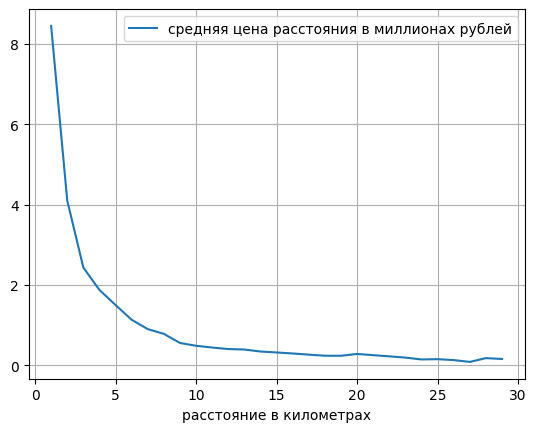

In [127]:
sorted_result_table.plot(x='расстояние в километрах', y='средняя цена расстояния в миллионах рублей',grid=True);

**Заметно, что с увеличением расстояния до центра Санкт-Петербурга цена уменьшается. То есть квартиры, расположенные близко к центру города, самые дорогие.**

Создадим нужную сводную таблицу.

In [128]:
new_df = df[df['locality_name_filtred']=='санкт-петербург']

In [129]:
price_data = new_df.pivot_table(index='cityCenters_nearest_km', values='price_per_area',aggfunc='median')

Построим график зависимости стоимости квадратного метра для каждого километра удаляясь от центра города.

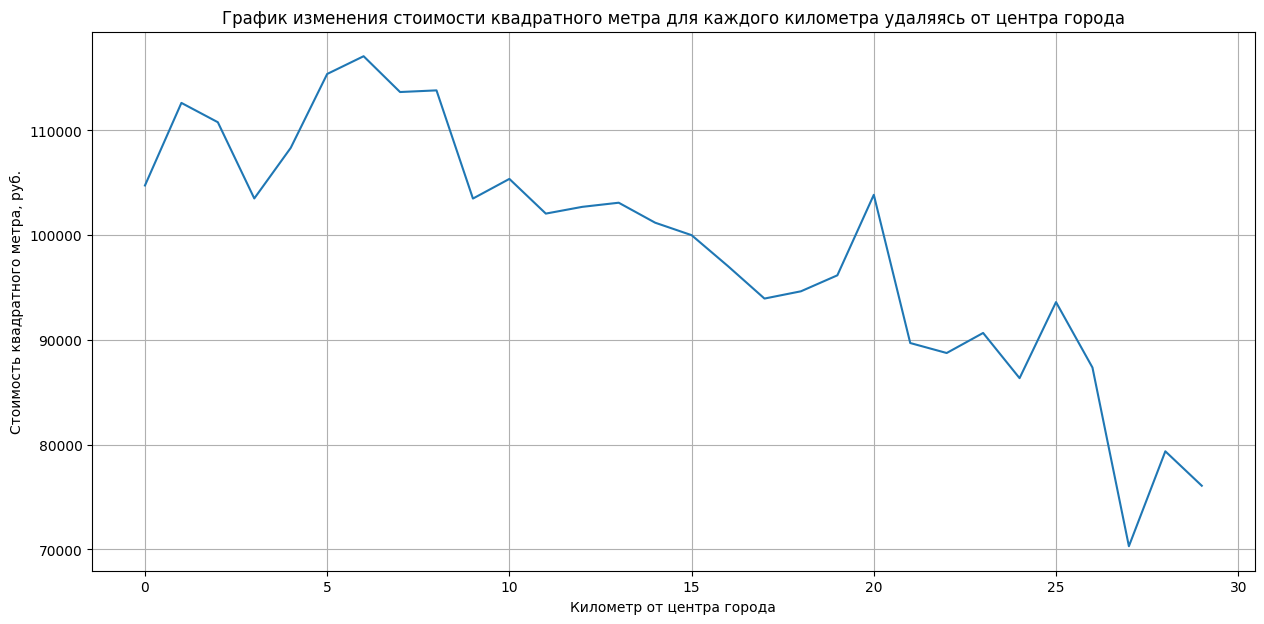

In [130]:
price_data.plot(y='price_per_area',grid=True,legend=False,figsize=(15,7));
plt.title('График изменения стоимости квадратного метра для каждого километра удаляясь от центра города');
plt.xlabel('Километр от центра города');
plt.ylabel('Cтоимость квадратного метра, руб.');

Наблюдается тенденция к уменьшению цены квадратного метра по мере удаления от центра Санкт-Петербурга.

### Общий вывод

В результате исследования были получены следующие результаты:
* общая площадь квартир распределена нормально. Преимущественно встречаются объявления с квартирами, общая площадь которых равна приблизительно 42 квадратных метра
* чаще всего встречаются квартиры с жилой площадью около 18, 36 и 45 квадратных метров. Такое распределение скорее всего связано с количеством жилых комнат в квартирах. То есть 18 метров соответствуют однушкам, а 36 и 45 `-` двушкам и трешкам соответственно
* площадь кухни распределена нормально. Чаще всего встречаются квартиры с площадью кухни равной 8 квадратных метров
* цена на квартиру распределена нормально. Наиболее частое её значение это 4 миллиона рублей
* наиболее частые случаи `-` это квартиры с 1 и 2 комнатами. Квартир с большим числом комнат меньше
* наиболее частое значение высоты потолков `-` 2.7 метров
* самый частый случай `-` это квартиры, расположенные на втором этаже 
* квартир, расположенных на первом и последнем этажах приблизительно одинаково. Объявлений с другими этажами заметно больше
* больше всего объявлений соответсвует квартирам, находящимся в пяти и девяти этажных домах
* наиболее частые расстояния до центра города `-` 5 км, 12 км и 15 км
* наиболее частые расстояния до ближайшего аэропорта `-` это расстояния от 16 до 38 км
* расстояние до ближайшего парка распределено нормально. Наиболее частое значение этого параметра `-` 500 метров
* чаще всего объявления публиковались в будние дни. Причем количество публикаций распределено равномерно по будним дням. На выходных публикации происходили реже
* на месяцы осени приходится большое количесто объявлений. Причем с каждым месяцем осени объявлений становится всё больше. На последний месяц зимы приходится больше всего объявлений среди других месяцев года. На май приходится меньше всего объявлений. Летом объявления равномерно распределены по месяцам.
* в среднем продажа квартиры занимает от 3 месяцев до полугода, но есть и случаи с очень быстрыми продажами в течение 10 дней, а также имеются и случаи с необычно долгими продажами по 4 года
* чем больше общая площадь квартиры, тем выше её цена
* чем больше жилая площадь, тем больше стоимость квартиры
* чем больше площадь кухни в квартире, тем больше стоимость этой квартиры
* чем больше в квартире комнат, тем больше ее полная стоимость 
* в среднем квартиры, расположенные на первом этаже, самые дешёвые. Расположенные на последем этаже квартиры в среднем немного дороже. А остальные квартиры самые дорогие. 
* стоимость объекта не зависит ни от дня недели публикации объявления, ни от месяца
* медианная цена на квартиры уменьшалась с 2014 года по 2017, а после 2017 года возрастала
* среди 10 населённых пунтков с наибольшим числом объявлений самая высокая стоимость квадратного метра в Санкт-Петербурге, а самая низкая `-` в Выборге
* наблюдается тенденция к уменьшению цены квадратного метра по мере удаления от центра Санкт-Петербурга